In [1]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')

1

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import sys

import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

import copy
import numpy as np
import math
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from pycmqlib3.utility import dataseries
from pycmqlib3.utility import dbaccess
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh


In [4]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'SM', "SF", 'nr'] # 'ZC', 
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg', 'PF'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA', 'lh', 'PK'] # 'CY', 
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2015,12,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2019,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,9,1),  'sn':datetime.date(2017,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 10, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2019,4,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 2, 1), 'eg': datetime.date(2019, 4, 2), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 5), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1), 'PF': datetime.date(2021,1,1), 'PK': datetime.date(2021,4,1), }
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1),}

In [5]:
from numpy.lib.stride_tricks import sliding_window_view

def rolling_percentile(ts, win = 100, direction = 'max'):
    data = ts.to_numpy()
    sw = sliding_window_view(data, win, axis=0).T
    scores_np = np.empty(len(ts))
    scores_np.fill(np.nan)
    scores_np[(win-1):] = ((sw <= sw[-1:, ...]).sum(axis=0).T / sw.shape[0]).flatten()
    scores_np_ts = pd.Series(scores_np, index = ts.index)
    if direction == 'min':
        scores_np_ts = 1 - scores_np_ts
    return scores_np_ts


In [5]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2022, 8, 10)

delimiter = '-'
rev_char = '!'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts + ['T', 'TF', 'au']  # ['IF', 'IH', 'IC'] #
shift_mode = 1
freq = 'd'

old_nearby = True
if old_nearby:
    nearby_func = misc.nearby
else:
    nearby_func = dataseries.nearby

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'shift_mode': shift_mode}
v_args  = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
lu_args = {'roll_rule': '-45b', 'freq': freq, 'shift_mode': shift_mode}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'shift_mode': shift_mode}
bond_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
precious_args = {'roll_rule': '-15b', 'freq': freq, 'shift_mode': shift_mode}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn', 'ss']:
        use_args = base_args
    elif asset in ['ni', 'jd', 'lh', 'eg', 'eb']:
        use_args = base2_args
    elif asset in ['sc',]:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in ['lu']:
        use_args = lu_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            if old_nearby == False:
                contlist, exch = dbaccess.prod_main_cont_exch(asset)
                use_args['contract_filter'] = contlist 
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = nearby_func(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = i, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_d

loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = fu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = eg, nb = 1, args = {'roll_rule': '-40b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 2), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = eg, nb = 2, args = {'roll_rule': '-40b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 2), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = eb, nb = 1, args = {'roll_rule': '-40b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2020, 2, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = eb, nb = 2, args = {'roll_rule': '-40b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2020, 2, 1), 'end

loading mkt = T, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = T, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = TF, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 6, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = TF, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 6, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 2}
loading mkt = au, nb = 1, args = {'roll_rule': '-15b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2015, 12, 1), 'end_date': datetime.date(2022, 8, 10), 'n': 1}
loading mkt = au, nb = 2, args = {'roll_rule': '-15b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2015, 12, 1), 'end

In [6]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    exec_field = input_args.get('exec_field', 'open')
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))    
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0

        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    if asset_scaling:
        adf['scaling'] = 36.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling']  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


In [7]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')

    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0
            
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    if asset_scaling:
        adf['scaling'] = 36.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling']\
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields     
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

In [8]:
#ind_metal_mkts
# scenarios = [('tscarry', 'ryield', 0.33, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'macdnma', 0.03, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
#              ('tsmom', 'macdnma', 0.03, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
#              ('tsmom', 'macdnma', 0.03, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
#              #('xsmom', 'mom', 0.0, 130, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'mom', 0.0, 230, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 60, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 10, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 40, 20, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'macdnma', 0.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#             ] 

#commod_mkts
scenarios_elite = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), #2.2
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), #0.95
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]), #0.69
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
]

scenarios_elite_new = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
        ('tsmom', 'ewmac', 0.09, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.07, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.04, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.025, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.18, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.216, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.255, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.4, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),                       
]


#commod_mkts
scenarios_all = [ \
             ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             #('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldsma', 0.15, 1, 110, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma',1.5, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma', 1.8, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldnma', 0.2, 1, 210, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('tsmom', 'momxma', 0.2, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'momxma', 0.15, 40, 80, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.375, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 30, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 220, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 40, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 110, 5, (misc.sign, {}, 'sign'), [0.0]), \
             ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
             ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
             ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
             #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 70, 60, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 100, 80, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 90, 10, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'macdnma', 0.1, 8, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 12.5], 0.2), \
             #('xsmom', 'macdnma', 0.1, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
             #('xsmom', 'macdnma', 0.1, 32, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 3.125], 0.2), \
             #('xsmom', 'macdnma', 0.1, 64, 100, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 1.56], 0.2), \
            ]

scenarios_mixed = [('tscarry', 'ryield', 3.0, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'macdnma', 1.0, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
                 ('tsmom', 'macdnma', 1.0, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
                 ('tsmom', 'macdnma', 1.0, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
                 #('xsmom', 'mom', 1.0, 130, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'mom', 1.0, 230, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 60, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 10, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 40, 20, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'macdnma', 1.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), 
] 


scenarios_intraday = [ \
             #('xsfact', 'trdstrsma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xsfact', 'trdstrsma', 1.0, 1, 15, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 5, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 20, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
            ]

scenarios_test = [
    ('tsmom', 'ewmac', 1.0, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),
]

def transform_output(vdf):    
    udf = vdf.reset_index()
    udf.columns = ['index', 'value']
    udf['metric'] = udf['index'].apply(lambda x: '_'.join(x.split('_')[:-1]))
    udf['tenor'] = udf['index'].apply(lambda x: x.split('_')[-1])
    udf['tenor_in_years'] = udf['tenor'].apply(lambda x: int(x[:-1])/12 if 'm' in x else int(x[:-1]))
    out_df = pd.pivot_table(udf, index = 'tenor_in_years', columns = 'metric', values = 'value')    
    return out_df.round(2)



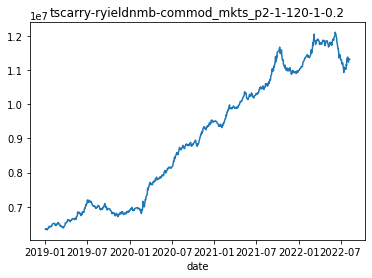

tscarry-ryieldnmb-commod_mkts_p2-1-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.15          -0.23         -0.13  63982.33
1.0                     0.89           1.36          0.72  60177.11
2.0                     1.75           2.56          1.15  48743.36
3.0                     2.13           3.17          1.28  44662.37
4.0                     1.96           2.93          1.11  42000.95
5.0                     2.05           3.03          1.07  39015.78
6.0                     2.12           3.15          1.06  37126.38
7.0                     2.04           3.01          0.98  35662.81
8.0                     1.91           2.84          0.88  34358.76
9.0                     2.11           3.13          0.94  33353.74
10.0                    2.21           3.29          0.96  32388.20
11.0                    2.11           3.13          0.89  31418.82


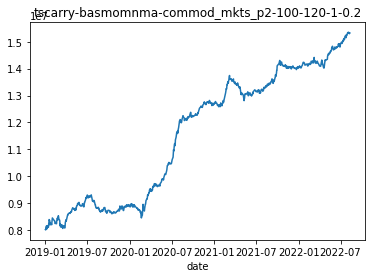

tscarry-basmomnma-commod_mkts_p2-100-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.93           4.74          6.11  52438.57
1.0                     2.66           4.58          5.30  50022.82
2.0                     2.08           3.40          1.79  50720.82
3.0                     2.68           4.54          2.41  52980.13
4.0                     2.32           3.63          2.14  54571.77
5.0                     2.19           3.35          1.91  51449.17
6.0                     2.18           3.41          1.84  49917.54
7.0                     1.95           3.00          1.33  51770.63
8.0                     1.72           2.66          1.05  51079.57
9.0                     1.88           2.89          1.11  49672.08
10.0                    1.99           3.06          1.14  48137.84
11.0                    1.96           2.94          1.09  46499.22

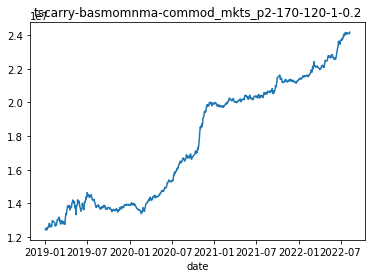

tscarry-basmomnma-commod_mkts_p2-170-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     4.20           8.13         11.45  79919.90
1.0                     3.25           6.30          7.97  73431.00
2.0                     3.36           6.41          8.36  74364.73
3.0                     3.27           5.84          5.62  69547.42
4.0                     2.55           4.13          2.54  78486.71
5.0                     2.50           3.95          2.31  72524.29
6.0                     2.44           3.90          2.16  69816.28
7.0                     2.33           3.77          1.92  76553.37
8.0                     2.10           3.40          1.29  75111.92
9.0                     2.26           3.63          1.35  72732.65
10.0                    2.31           3.67          1.32  70121.97
11.0                    2.13           3.30          1.17  67312.32

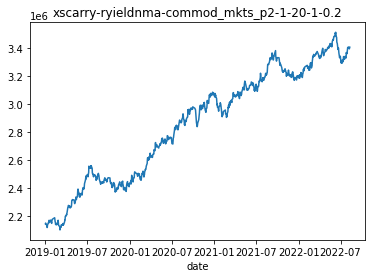

xscarry-ryieldnma-commod_mkts_p2-1-20-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.28           1.82          1.39  15077.83
1.0                     0.93           1.36          0.99  14797.09
2.0                     1.12           1.83          1.24  15355.73
3.0                     1.38           2.26          1.48  14984.19
4.0                     1.52           2.50          1.58  14453.63
5.0                     1.63           2.67          1.64  14032.82
6.0                     1.51           2.46          1.48  13660.27
7.0                     1.53           2.45          1.44  13102.29
8.0                     1.44           2.30          1.32  12838.84
9.0                     1.57           2.52          1.44  12777.35
10.0                    1.73           2.76          1.55  12462.21
11.0                    1.65           2.57          1.42  12019.68


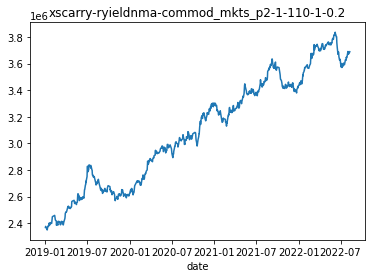

xscarry-ryieldnma-commod_mkts_p2-1-110-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.98           1.24          0.94  15958.20
1.0                     0.93           1.33          0.87  15655.03
2.0                     1.37           2.20          1.29  15694.93
3.0                     1.47           2.38          1.31  14848.39
4.0                     1.73           2.80          1.48  14572.09
5.0                     1.81           2.91          1.50  14093.26
6.0                     1.82           2.94          1.47  13727.91
7.0                     1.80           2.88          1.40  13194.78
8.0                     1.55           2.48          1.17  12808.20
9.0                     1.81           2.89          1.35  12642.82
10.0                    1.88           2.96          1.37  12373.89
11.0                    1.80           2.78          1.27  11946.29


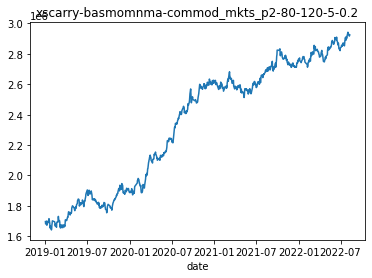

xscarry-basmomnma-commod_mkts_p2-80-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.01           3.51          3.83  13136.86
1.0                     1.23           1.99          2.09  13061.93
2.0                     1.25           1.91          1.57  13361.11
3.0                     1.85           2.90          2.25  12966.17
4.0                     1.71           2.62          2.08  12945.76
5.0                     1.73           2.62          2.03  12517.53
6.0                     1.58           2.44          1.80  12190.54
7.0                     1.57           2.42          1.73  11752.71
8.0                     1.36           2.10          1.48  11549.06
9.0                     1.51           2.33          1.60  11310.91
10.0                    1.67           2.55          1.72  10992.27
11.0                    1.64           2.44          1.63  10624.88


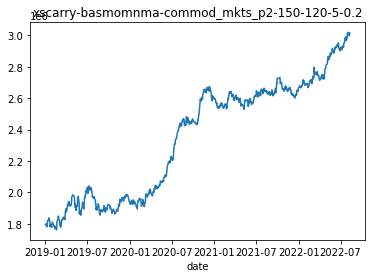

xscarry-basmomnma-commod_mkts_p2-150-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     3.18           5.90          8.20  13462.25
1.0                     1.92           3.54          2.92  12600.00
2.0                     1.46           2.41          2.04  12910.71
3.0                     1.94           3.22          2.67  12669.49
4.0                     1.71           2.63          1.96  13452.20
5.0                     1.67           2.55          1.81  12627.69
6.0                     1.58           2.48          1.66  12254.86
7.0                     1.65           2.60          1.68  11895.09
8.0                     1.47           2.33          1.44  11471.58
9.0                     1.70           2.69          1.63  11206.34
10.0                    1.80           2.80          1.66  10821.82
11.0                    1.72           2.60          1.53  10407.49

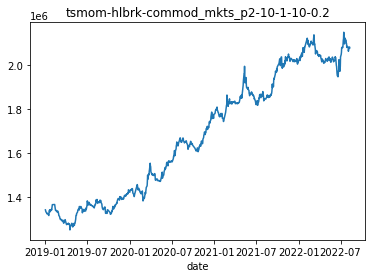

tsmom-hlbrk-commod_mkts_p2-10-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.18          -0.25         -0.20  13678.17
1.0                     1.21           1.75          1.26  12490.19
2.0                     1.14           1.65          1.11  11719.38
3.0                     1.39           2.04          1.25  10774.73
4.0                     1.28           1.90          1.05   9849.67
5.0                     1.24           1.87          0.98   9434.36
6.0                     1.25           1.92          0.96   9222.79
7.0                     1.24           1.89          0.94   9066.11
8.0                     1.24           1.90          0.91   8824.85
9.0                     1.39           2.13          0.99   8560.40
10.0                    1.46           2.22          1.01   8335.13
11.0                    1.51           2.32          1.04   8203.71


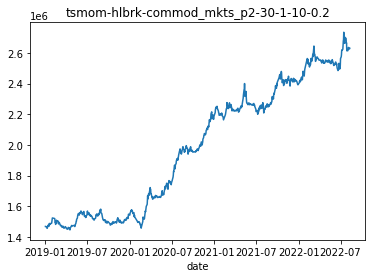

tsmom-hlbrk-commod_mkts_p2-30-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.74           0.95          1.22  16724.61
1.0                     1.62           2.35          2.57  16053.68
2.0                     1.47           2.11          1.70  14600.25
3.0                     1.74           2.54          1.87  13565.69
4.0                     1.57           2.28          1.53  12282.38
5.0                     1.35           1.97          1.26  11737.97
6.0                     1.32           1.98          1.21  11663.43
7.0                     1.35           2.03          1.21  11338.27
8.0                     1.32           1.99          1.16  11117.28
9.0                     1.43           2.15          1.22  10786.07
10.0                    1.53           2.31          1.28  10552.48
11.0                    1.55           2.35          1.27  10368.16


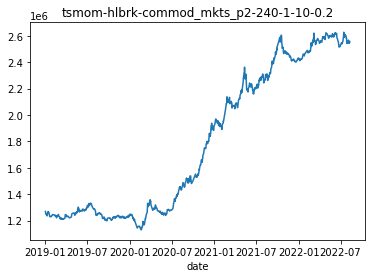

tsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.77           1.09          1.56  13705.74
1.0                     1.35           1.99          1.48  14070.69
2.0                     2.21           3.41          2.79  16206.81
3.0                     1.98           2.95          2.23  14475.64
4.0                     1.67           2.46          1.70  13061.04
5.0                     1.45           2.12          1.36  12077.83
6.0                     1.46           2.16          1.35  11910.54
7.0                     1.37           2.04          1.25  11698.14
8.0                     1.34           2.01          1.21  11654.71
9.0                     1.51           2.26          1.32  11288.88
10.0                    1.51           2.23          1.28  10897.66
11.0                    1.44           2.10          1.18  10570.05


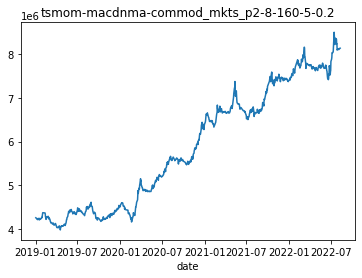

tsmom-macdnma-commod_mkts_p2-8-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.67           0.89          0.99  68357.30
1.0                     1.59           2.22          2.05  60242.75
2.0                     1.47           2.05          1.47  54719.37
3.0                     1.60           2.25          1.44  49327.30
4.0                     1.42           2.01          1.16  44643.66
5.0                     1.21           1.74          0.94  42478.92
6.0                     1.24           1.84          0.95  41592.08
7.0                     1.24           1.85          0.93  40864.26
8.0                     1.19           1.77          0.87  39695.94
9.0                     1.28           1.88          0.89  38138.06
10.0                    1.32           1.94          0.89  36892.50
11.0                    1.35           1.95          0.88  35851.44


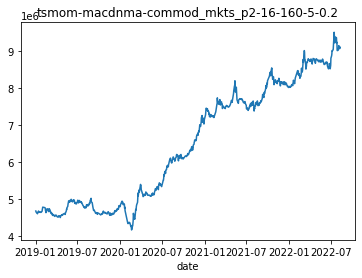

tsmom-macdnma-commod_mkts_p2-16-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.24           1.65          2.94  74763.86
1.0                     1.57           2.21          3.12  66412.59
2.0                     1.62           2.27          1.90  60802.03
3.0                     1.62           2.21          1.73  57483.23
4.0                     1.41           1.92          1.35  51624.81
5.0                     1.14           1.58          1.04  49051.14
6.0                     1.18           1.68          1.06  48197.16
7.0                     1.25           1.79          1.09  46937.91
8.0                     1.19           1.71          1.01  45694.79
9.0                     1.26           1.81          1.03  43870.41
10.0                    1.30           1.85          1.02  42438.50
11.0                    1.31           1.85          1.00  41238.86


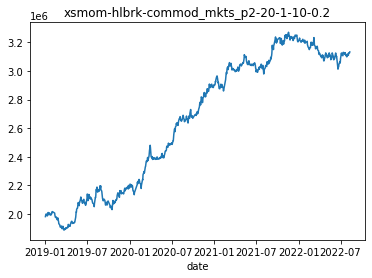

xsmom-hlbrk-commod_mkts_p2-20-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.43          -0.67         -0.41  13162.42
1.0                     0.52           0.87          0.45  14146.26
2.0                     1.06           1.79          0.91  13955.07
3.0                     1.53           2.65          1.29  13751.81
4.0                     1.45           2.57          1.16  13034.48
5.0                     1.41           2.49          1.10  12718.27
6.0                     1.14           1.98          0.85  12210.42
7.0                     1.26           2.18          0.91  11773.65
8.0                     1.33           2.27          0.93  11415.25
9.0                     1.53           2.59          1.05  11233.95
10.0                    1.71           2.87          1.15  10986.78
11.0                    1.74           2.88          1.14  10658.34


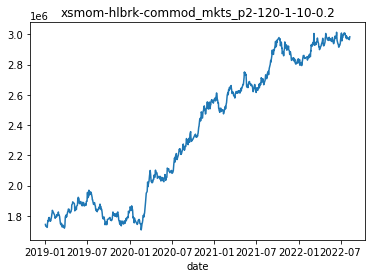

xsmom-hlbrk-commod_mkts_p2-120-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.11           1.62          2.65  16019.71
1.0                     1.13           1.75          1.61  16600.11
2.0                     1.50           2.40          2.08  16136.82
3.0                     1.59           2.65          2.15  15789.32
4.0                     1.33           2.16          1.22  15252.74
5.0                     1.15           1.84          1.03  14710.88
6.0                     1.06           1.69          0.91  14223.03
7.0                     1.05           1.67          0.87  13589.06
8.0                     1.06           1.68          0.85  13222.24
9.0                     1.25           1.97          0.98  12933.99
10.0                    1.40           2.20          1.07  12607.00
11.0                    1.44           2.22          1.06  12216.24


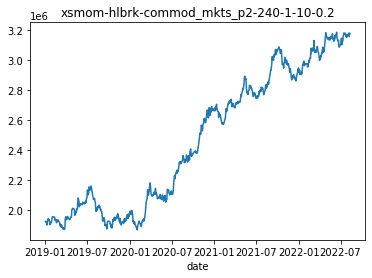

xsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.68           2.51          3.28  16323.15
1.0                     1.50           2.40          1.73  16537.22
2.0                     1.76           2.86          1.95  15862.61
3.0                     1.67           2.73          1.81  15521.88
4.0                     1.42           2.28          1.15  14958.69
5.0                     1.43           2.28          1.12  14370.65
6.0                     1.36           2.18          1.03  13939.42
7.0                     1.28           2.05          0.93  13387.05
8.0                     1.23           1.97          0.87  12993.61
9.0                     1.43           2.27          0.99  12741.79
10.0                    1.56           2.45          1.05  12316.79
11.0                    1.59           2.43          1.03  11886.47


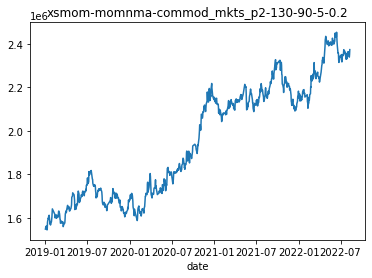

xsmom-momnma-commod_mkts_p2-130-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.81           3.25          3.55  17156.23
1.0                     0.81           1.30          0.91  16733.71
2.0                     1.10           1.72          1.20  16308.23
3.0                     0.95           1.48          1.00  15671.77
4.0                     0.85           1.32          0.86  15154.45
5.0                     0.96           1.48          0.94  14493.18
6.0                     0.90           1.40          0.85  14125.51
7.0                     1.00           1.55          0.92  13657.56
8.0                     0.94           1.45          0.83  13171.32
9.0                     1.10           1.69          0.96  12907.32
10.0                    1.15           1.74          0.96  12450.52
11.0                    1.18           1.74          0.95  12002.97


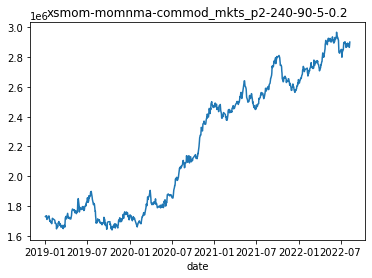

xsmom-momnma-commod_mkts_p2-240-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.69           2.77          2.56  15988.44
1.0                     1.45           2.27          1.42  15293.24
2.0                     1.79           3.00          1.76  15297.89
3.0                     1.81           2.92          1.70  14679.58
4.0                     1.38           2.18          1.22  14428.62
5.0                     1.54           2.40          1.31  13943.43
6.0                     1.50           2.36          1.24  13455.14
7.0                     1.43           2.23          1.14  13011.58
8.0                     1.29           1.99          0.99  12605.35
9.0                     1.40           2.14          1.05  12257.32
10.0                    1.53           2.32          1.11  11828.01
11.0                    1.52           2.21          1.06  11347.03


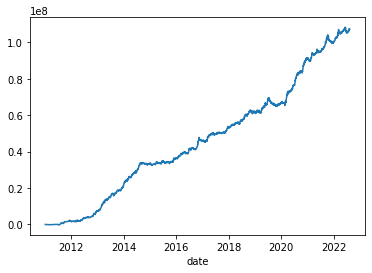

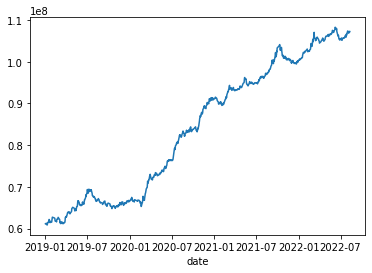

date
2022-06-30    1.054567e+08
2022-07-01    1.054683e+08
2022-07-04    1.054681e+08
2022-07-05    1.056877e+08
2022-07-06    1.054851e+08
2022-07-07    1.051275e+08
2022-07-08    1.053492e+08
2022-07-11    1.056122e+08
2022-07-12    1.055875e+08
2022-07-13    1.056737e+08
2022-07-14    1.056060e+08
2022-07-15    1.057268e+08
2022-07-18    1.057055e+08
2022-07-19    1.058740e+08
2022-07-20    1.060237e+08
2022-07-21    1.061667e+08
2022-07-22    1.062697e+08
2022-07-25    1.058866e+08
2022-07-26    1.065926e+08
2022-07-27    1.063145e+08
2022-07-28    1.066214e+08
2022-07-29    1.068100e+08
2022-08-01    1.073669e+08
2022-08-02    1.073154e+08
2022-08-03    1.071794e+08
2022-08-04    1.068539e+08
2022-08-05    1.070909e+08
2022-08-08    1.069621e+08
2022-08-09    1.071336e+08
2022-08-10    1.072464e+08
Name: daily_pnl, dtype: float64
metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5            

In [9]:
# res = {}
stats_list = []
cum_list = []
rev_char = '!'

out_cols = ['sharpe_ratio', 'sortino_ratio', 'calmar_ratio', 'std_pnl']
pnl_tenors = ['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '11y']

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'ni', 'sn', 'SM', 'SF', 'ss']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr', 'T', 'lh', 'PF', 'PK', 'au']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'ss', 'eb', 'eg'] # 'ZC', 
## 'au', 'ag', 'b']

commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'ss', 'pg', 'T', 'lu', 'lh',] # 'ZC', 'CJ'] # 'PK', 'ni', 'SF',   
# 'T', 'MA', 'SF', 'lh', 'lu', 'fu'] # 'ZC', 'CJ', ] #


product_list = commod_mkts_p2 # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts_p2' # 'metal_mixed_mkts' #

scenarios = scenarios_elite

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2022,8,10)

quantile = 0.2
cost_ratio = 0.5
total_risk = 4600.0
asset_scaling = False
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]
pos_map = (None, {}, '')

exec_field = 'open'

save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

run_pos_sum = True
pos_sum = pd.DataFrame()
dpnl_sum = pd.DataFrame()
pos_list = []

port_pnl = pd.Series()
dpnl_by_scen = [] 

for scen in scenarios:
    if len(scen) >= 8:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 9:
                quantile = scen[8]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        pos_map = scen[6]
        params = scen[7]        
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['total_risk'] = total_risk
    run_args['asset_scaling'] = asset_scaling
    run_args['pnl_tenors'] = pnl_tenors
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'][pd.to_datetime('2019-01-01'):].plot(title = run_name)
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']    
    print(run_name, '\n', transform_output(vdf)[out_cols])
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        dpnl_by_scen.append(res['cum_pnl'].diff().dropna())
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        dpnl_sum = dpnl_sum.add(res['dpnl'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
port_pnl[pd.to_datetime('2019-01-01'):].plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(port_pnl[-30:])
print(transform_output(vdf)[out_cols])
port_pnl.to_csv(file_folder + "port_pnl.csv")
cpnl = dpnl_sum.cumsum()


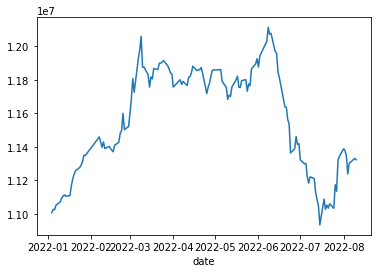

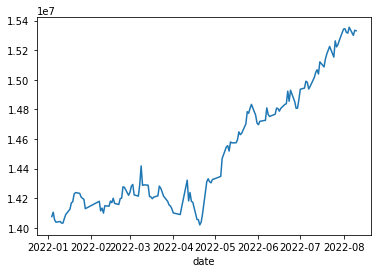

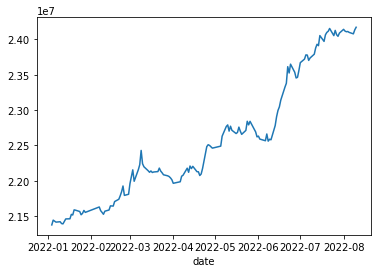

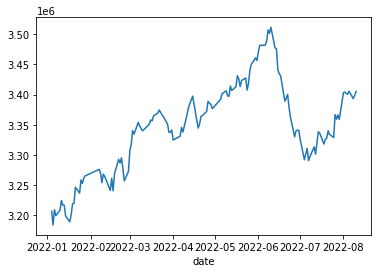

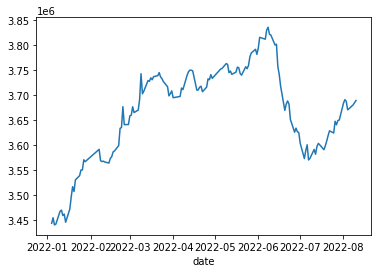

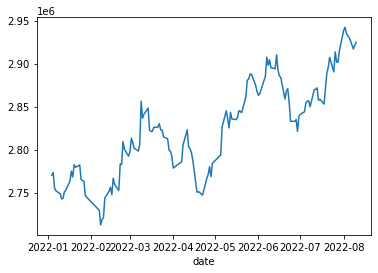

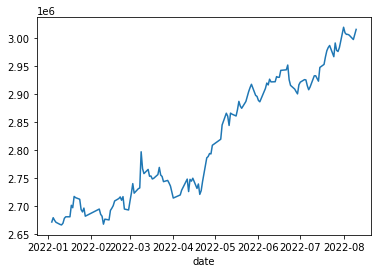

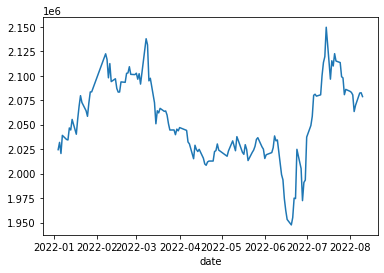

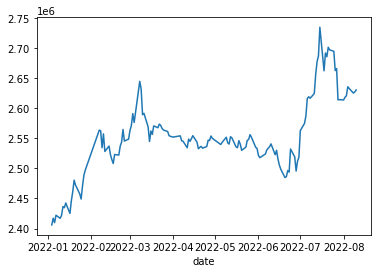

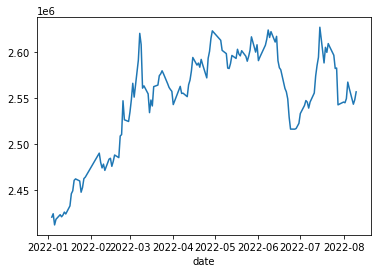

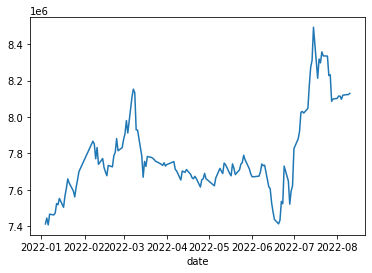

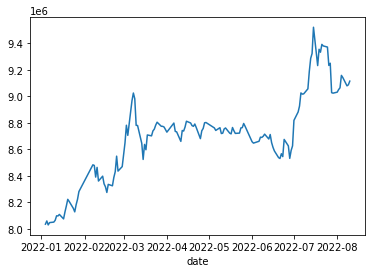

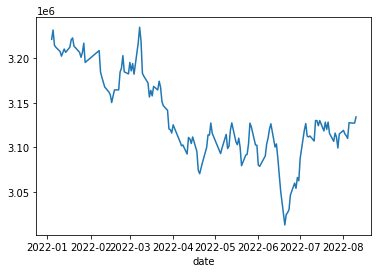

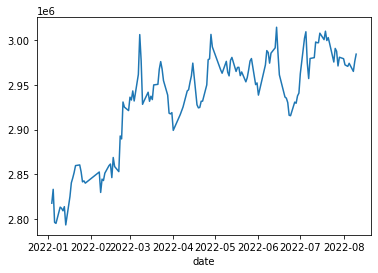

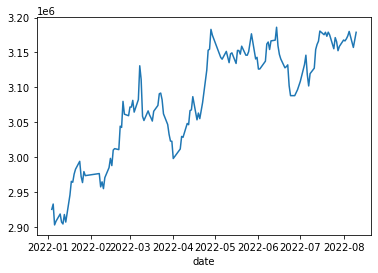

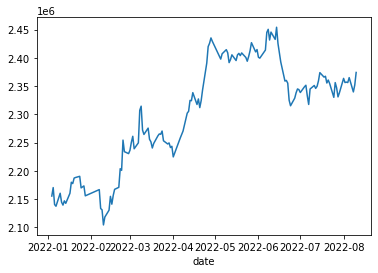

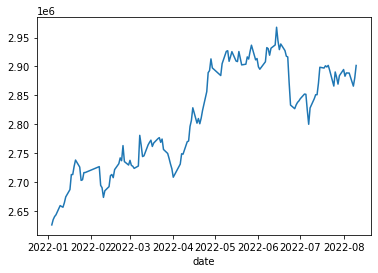

In [10]:
for i in range(len(cum_list)):
    cum_list[i][datetime.date(2022,1,1):].plot()
    plt.show()

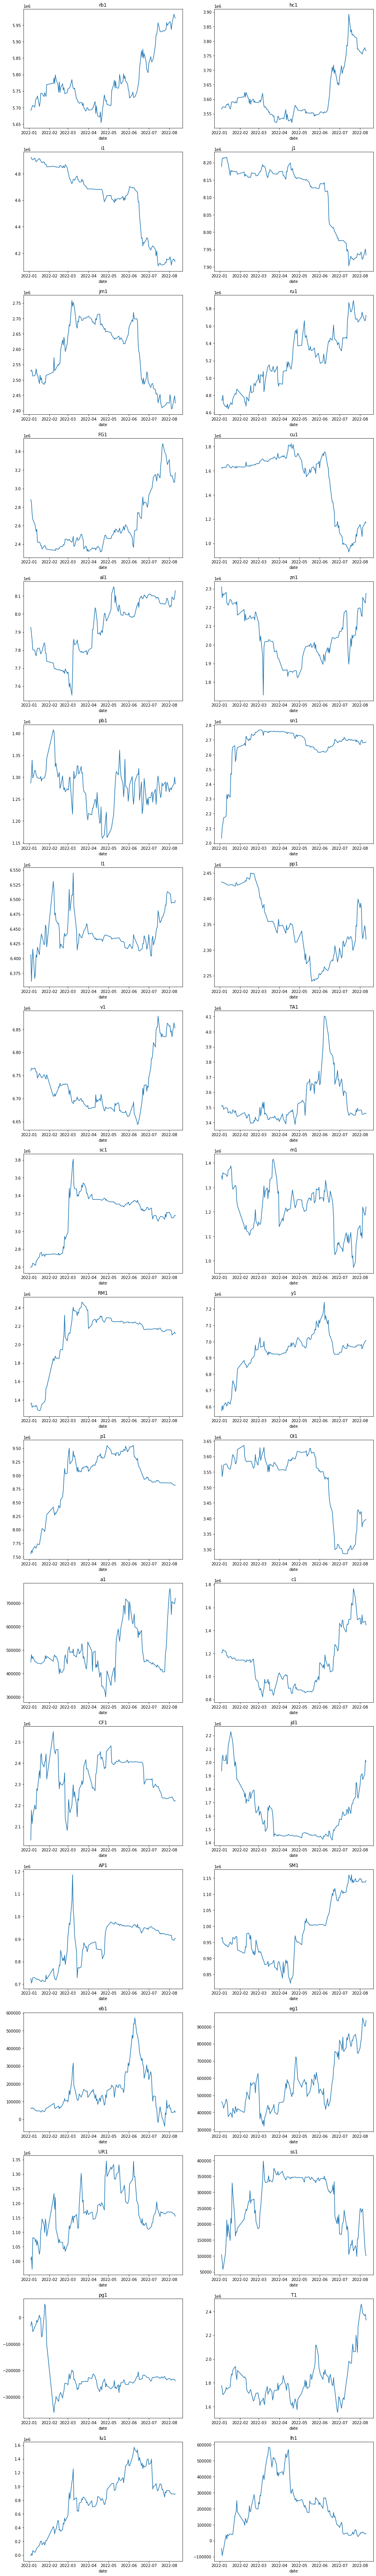

In [11]:
rows = math.ceil(len(product_list)/2)
fig, ax = plt.subplots(rows, 2, figsize=(16, 120))

for i, col in enumerate(cpnl.columns):
    row_id = i//2
    col_id = i % 2
    cpnl[col][datetime.date(2022,1,1):].plot(ax = ax[row_id, col_id], title = col)  


<AxesSubplot:xlabel='date'>

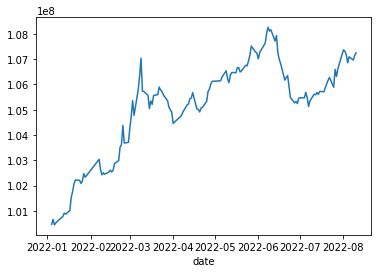

In [13]:
port_pnl[pd.to_datetime('2022-01-01'):].plot()

In [14]:
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:    
    print(pos_sum)

port_pnl.index = pd.to_datetime(port_pnl.index)
print(port_pnl.diff().resample('M').sum()[-60:])

          rb-pos      hc-pos       i-pos      j-pos      jm-pos      ru-pos  \
0       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
1       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
2       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
3       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
4       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
...          ...         ...         ...        ...         ...         ...   
2806   98.791024 -206.473803   62.364163  39.374822  108.706696 -456.800003   
2807  116.120847  -44.498892  157.672545 -36.788310  116.869532 -327.497911   
2808   90.858193 -232.646286  380.561858  54.429910  133.501775 -347.645013   
2809  130.273312 -242.033610  557.864302  59.576411   34.606597 -334.416251   
2810  134.179025   34.689276  724.022531  51.470099   -0.195122 -355.494138   

           FG-pos     cu-pos     al-pos      zn-pos

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:200% !important;}</style>"))

sim_name = tscarry, run_mode = ryieldnmb


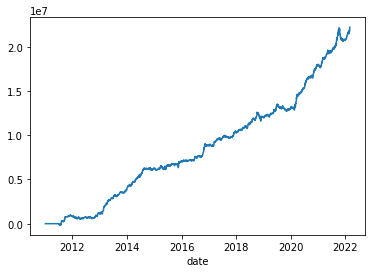

                               0
calmar_ratio_10y        1.484123
calmar_ratio_11y        1.384000
calmar_ratio_1y         2.565960
calmar_ratio_2y         3.058471
calmar_ratio_3y         2.264433
calmar_ratio_4y         1.981274
calmar_ratio_5y         1.833591
calmar_ratio_6m         2.558900
calmar_ratio_6y         1.711851
calmar_ratio_7y         1.557927
calmar_ratio_8y         1.522609
calmar_ratio_9y         1.546097
sharpe_ratio_10y        2.578932
sharpe_ratio_11y        2.480671
sharpe_ratio_1y         2.743904
sharpe_ratio_2y         3.733108
sharpe_ratio_3y         3.000239
sharpe_ratio_4y         2.734330
sharpe_ratio_5y         2.712267
sharpe_ratio_6m         2.192636
sharpe_ratio_6y         2.653997
sharpe_ratio_7y         2.471066
sharpe_ratio_8y         2.494008
sharpe_ratio_9y         2.614937
sortino_ratio_10y       4.102355
sortino_ratio_11y       3.886569
sortino_ratio_1y        3.983179
sortino_ratio_2y        5.932676
sortino_ratio_3y        4.866073
sortino_ra

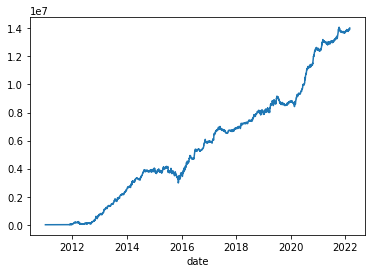

                              0
calmar_ratio_10y       1.220041
calmar_ratio_11y       1.122225
calmar_ratio_1y        2.471917
calmar_ratio_2y        6.451138
calmar_ratio_3y        2.635759
calmar_ratio_4y        2.456907
calmar_ratio_5y        2.209874
calmar_ratio_6m        3.645808
calmar_ratio_6y        2.261023
calmar_ratio_7y        1.258472
calmar_ratio_8y        1.224860
calmar_ratio_9y        1.264598
sharpe_ratio_10y       2.149704
sharpe_ratio_11y       2.069025
sharpe_ratio_1y        1.596269
sharpe_ratio_2y        3.838507
sharpe_ratio_3y        2.603063
sharpe_ratio_4y        2.473724
sharpe_ratio_5y        2.349358
sharpe_ratio_6m        2.224567
sharpe_ratio_6y        2.467041
sharpe_ratio_7y        2.008438
sharpe_ratio_8y        2.011347
sharpe_ratio_9y        2.152162
sortino_ratio_10y      3.338859
sortino_ratio_11y      3.088879
sortino_ratio_1y       2.513920
sortino_ratio_2y       7.126493
sortino_ratio_3y       4.510668
sortino_ratio_4y       3.987290
sortino_

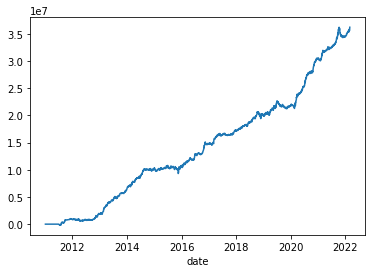

                              0
sharpe_ratio_10y       2.678773
sharpe_ratio_11y       2.586804
sharpe_ratio_1y        2.690046
sharpe_ratio_2y        4.160742
sharpe_ratio_3y        3.123859
sharpe_ratio_4y        2.896322
sharpe_ratio_5y        2.842913
sharpe_ratio_6m        2.341362
sharpe_ratio_6y        2.859543
sharpe_ratio_7y        2.548154
sharpe_ratio_8y        2.559257
sharpe_ratio_9y        2.701819
std_pnl_10y        86548.343250
std_pnl_11y        83134.487116
std_pnl_1y        115686.202637
std_pnl_2y        111899.090601
std_pnl_3y        108784.987934
std_pnl_4y        105110.047335
std_pnl_5y         98044.347424
std_pnl_6m        146167.418656
std_pnl_6y         94260.707618
std_pnl_7y         94862.233804
std_pnl_8y         92162.280085
std_pnl_9y         89217.991997
sim_name = xscarry, run_mode = ryieldnma


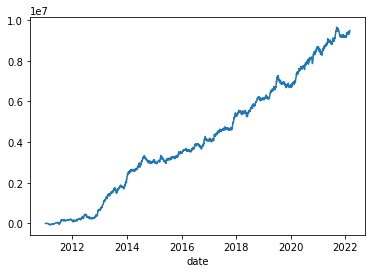

                              0
calmar_ratio_10y       1.663798
calmar_ratio_11y       1.541751
calmar_ratio_1y        2.060907
calmar_ratio_2y        2.601861
calmar_ratio_3y        1.958651
calmar_ratio_4y        1.770616
calmar_ratio_5y        1.909137
calmar_ratio_6m        0.052888
calmar_ratio_6y        1.717481
calmar_ratio_7y        1.617444
calmar_ratio_8y        1.534993
calmar_ratio_9y        1.653580
sharpe_ratio_10y       1.954578
sharpe_ratio_11y       1.887646
sharpe_ratio_1y        1.613633
sharpe_ratio_2y        2.040323
sharpe_ratio_3y        1.859258
sharpe_ratio_4y        1.767842
sharpe_ratio_5y        1.973672
sharpe_ratio_6m        0.042376
sharpe_ratio_6y        1.831522
sharpe_ratio_7y        1.784763
sharpe_ratio_8y        1.732594
sharpe_ratio_9y        1.883851
sortino_ratio_10y      3.182727
sortino_ratio_11y      2.996081
sortino_ratio_1y       2.664959
sortino_ratio_2y       3.532068
sortino_ratio_3y       3.192650
sortino_ratio_4y       3.015813
sortino_

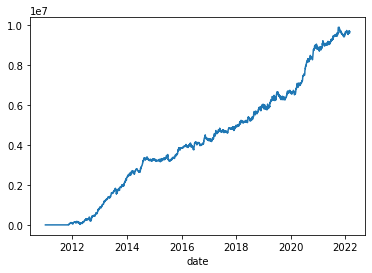

                              0
calmar_ratio_10y       2.016477
calmar_ratio_11y       1.864779
calmar_ratio_1y        1.312992
calmar_ratio_2y        3.238576
calmar_ratio_3y        2.620207
calmar_ratio_4y        2.394626
calmar_ratio_5y        2.268582
calmar_ratio_6m        0.880154
calmar_ratio_6y        1.997814
calmar_ratio_7y        1.935081
calmar_ratio_8y        1.878548
calmar_ratio_9y        1.999272
sharpe_ratio_10y       1.925516
sharpe_ratio_11y       1.864225
sharpe_ratio_1y        1.063039
sharpe_ratio_2y        2.503082
sharpe_ratio_3y        2.028373
sharpe_ratio_4y        1.856866
sharpe_ratio_5y        1.851074
sharpe_ratio_6m        0.683837
sharpe_ratio_6y        1.680854
sharpe_ratio_7y        1.685759
sharpe_ratio_8y        1.699908
sharpe_ratio_9y        1.853006
sortino_ratio_10y      2.969131
sortino_ratio_11y      2.761254
sortino_ratio_1y       1.652054
sortino_ratio_2y       4.213408
sortino_ratio_3y       3.244260
sortino_ratio_4y       2.889410
sortino_

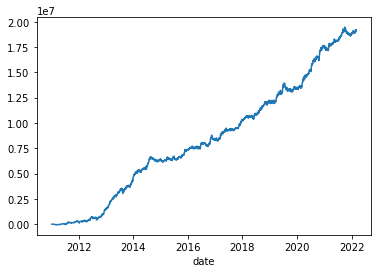

                             0
sharpe_ratio_10y      2.246582
sharpe_ratio_11y      2.174152
sharpe_ratio_1y       1.680389
sharpe_ratio_2y       2.702493
sharpe_ratio_3y       2.268503
sharpe_ratio_4y       2.109399
sharpe_ratio_5y       2.244740
sharpe_ratio_6m       0.437409
sharpe_ratio_6y       2.039513
sharpe_ratio_7y       2.016707
sharpe_ratio_8y       1.993759
sharpe_ratio_9y       2.158706
std_pnl_10y       54901.055371
std_pnl_11y       52514.942641
std_pnl_1y        62746.063620
std_pnl_2y        67314.252942
std_pnl_3y        67358.539887
std_pnl_4y        65864.804646
std_pnl_5y        62426.199133
std_pnl_6m        65923.516563
std_pnl_6y        61159.106577
std_pnl_7y        59069.079833
std_pnl_8y        57355.183247
std_pnl_9y        56716.118407
sim_name = tsmom, run_mode = hlbrk


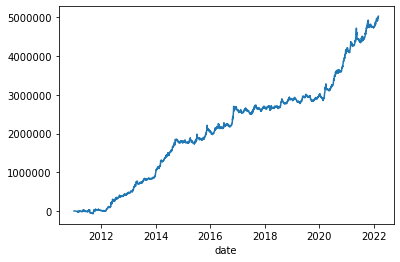

                              0
calmar_ratio_10y       1.384308
calmar_ratio_11y       1.266875
calmar_ratio_1y        2.060756
calmar_ratio_2y        2.918024
calmar_ratio_3y        1.981707
calmar_ratio_4y        1.593936
calmar_ratio_5y        1.370977
calmar_ratio_6m        5.842753
calmar_ratio_6y        1.347885
calmar_ratio_7y        1.275922
calmar_ratio_8y        1.327775
calmar_ratio_9y        1.374581
sharpe_ratio_10y       1.914610
sharpe_ratio_11y       1.816134
sharpe_ratio_1y        1.789448
sharpe_ratio_2y        2.738623
sharpe_ratio_3y        2.155097
sharpe_ratio_4y        1.893297
sharpe_ratio_5y        1.722073
sharpe_ratio_6m        2.750408
sharpe_ratio_6y        1.690040
sharpe_ratio_7y        1.631525
sharpe_ratio_8y        1.739639
sharpe_ratio_9y        1.851141
sortino_ratio_10y      2.986738
sortino_ratio_11y      2.802059
sortino_ratio_1y       2.618326
sortino_ratio_2y       4.112450
sortino_ratio_3y       3.276904
sortino_ratio_4y       2.885067
sortino_

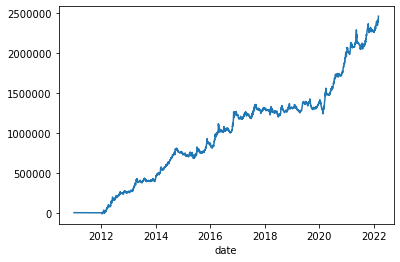

                              0
calmar_ratio_10y       1.031573
calmar_ratio_11y       0.945832
calmar_ratio_1y        1.593152
calmar_ratio_2y        2.431067
calmar_ratio_3y        1.595007
calmar_ratio_4y        1.233834
calmar_ratio_5y        1.086013
calmar_ratio_6m        6.754935
calmar_ratio_6y        1.082264
calmar_ratio_7y        1.043783
calmar_ratio_8y        1.033450
calmar_ratio_9y        1.020428
sharpe_ratio_10y       1.510861
sharpe_ratio_11y       1.447732
sharpe_ratio_1y        1.533452
sharpe_ratio_2y        2.554151
sharpe_ratio_3y        1.873304
sharpe_ratio_4y        1.544080
sharpe_ratio_5y        1.416533
sharpe_ratio_6m        2.879905
sharpe_ratio_6y        1.403976
sharpe_ratio_7y        1.386090
sharpe_ratio_8y        1.427654
sharpe_ratio_9y        1.458898
sortino_ratio_10y      2.322417
sortino_ratio_11y      2.138062
sortino_ratio_1y       2.278277
sortino_ratio_2y       3.874835
sortino_ratio_3y       2.791503
sortino_ratio_4y       2.333585
sortino_

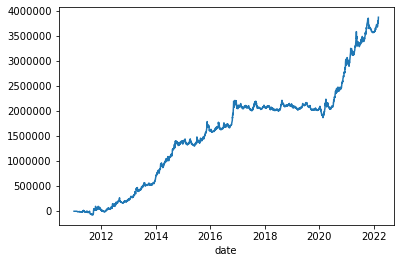

                              0
calmar_ratio_10y       1.161028
calmar_ratio_11y       1.058881
calmar_ratio_1y        2.425911
calmar_ratio_2y        3.360637
calmar_ratio_3y        2.062735
calmar_ratio_4y        1.330400
calmar_ratio_5y        1.071580
calmar_ratio_6m        3.027509
calmar_ratio_6y        1.121157
calmar_ratio_7y        1.088941
calmar_ratio_8y        1.135853
calmar_ratio_9y        1.190124
sharpe_ratio_10y       1.536606
sharpe_ratio_11y       1.447230
sharpe_ratio_1y        1.796524
sharpe_ratio_2y        2.564674
sharpe_ratio_3y        1.847542
sharpe_ratio_4y        1.520425
sharpe_ratio_5y        1.314059
sharpe_ratio_6m        2.371236
sharpe_ratio_6y        1.361201
sharpe_ratio_7y        1.346617
sharpe_ratio_8y        1.411807
sharpe_ratio_9y        1.520471
sortino_ratio_10y      2.255860
sortino_ratio_11y      2.107816
sortino_ratio_1y       2.588423
sortino_ratio_2y       3.874273
sortino_ratio_3y       2.655963
sortino_ratio_4y       2.172975
sortino_

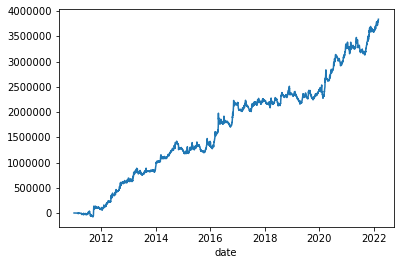

                              0
calmar_ratio_10y       1.080045
calmar_ratio_11y       1.023802
calmar_ratio_1y        1.775775
calmar_ratio_2y        2.270872
calmar_ratio_3y        1.512731
calmar_ratio_4y        1.195547
calmar_ratio_5y        1.068207
calmar_ratio_6m       12.738298
calmar_ratio_6y        1.147624
calmar_ratio_7y        1.052822
calmar_ratio_8y        1.021867
calmar_ratio_9y        1.024651
sharpe_ratio_10y       1.205013
sharpe_ratio_11y       1.173483
sharpe_ratio_1y        1.595438
sharpe_ratio_2y        1.925449
sharpe_ratio_3y        1.391992
sharpe_ratio_4y        1.191381
sharpe_ratio_5y        1.107447
sharpe_ratio_6m        3.378496
sharpe_ratio_6y        1.146124
sharpe_ratio_7y        1.077291
sharpe_ratio_8y        1.085878
sharpe_ratio_9y        1.123527
sortino_ratio_10y      1.810227
sortino_ratio_11y      1.749813
sortino_ratio_1y       2.565104
sortino_ratio_2y       2.999879
sortino_ratio_3y       2.164348
sortino_ratio_4y       1.842937
sortino_

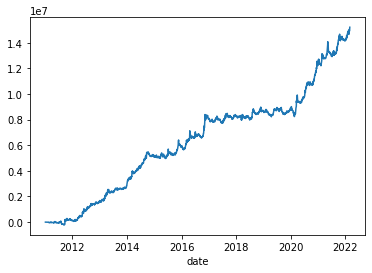

                             0
sharpe_ratio_10y      1.699749
sharpe_ratio_11y      1.625988
sharpe_ratio_1y       1.839428
sharpe_ratio_2y       2.637191
sharpe_ratio_3y       1.985112
sharpe_ratio_4y       1.683890
sharpe_ratio_5y       1.524196
sharpe_ratio_6m       3.052850
sharpe_ratio_6y       1.530816
sharpe_ratio_7y       1.487823
sharpe_ratio_8y       1.556869
sharpe_ratio_9y       1.640803
std_pnl_10y       57764.036078
std_pnl_11y       55715.215963
std_pnl_1y        85855.139298
std_pnl_2y        83279.804450
std_pnl_3y        72440.726473
std_pnl_4y        66840.880381
std_pnl_5y        63310.213117
std_pnl_6m        87366.458648
std_pnl_6y        64504.095397
std_pnl_7y        62927.494521
std_pnl_8y        61036.846923
std_pnl_9y        59226.869365
sim_name = xsmom, run_mode = hlbrk


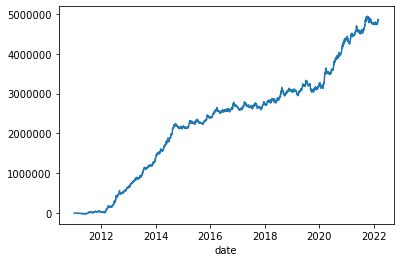

                              0
calmar_ratio_10y       1.705441
calmar_ratio_11y       1.563438
calmar_ratio_1y        2.039488
calmar_ratio_2y        3.927756
calmar_ratio_3y        2.136506
calmar_ratio_4y        1.781834
calmar_ratio_5y        1.582851
calmar_ratio_6m        1.345524
calmar_ratio_6y        1.349200
calmar_ratio_7y        1.369241
calmar_ratio_8y        1.476133
calmar_ratio_9y        1.593873
sharpe_ratio_10y       1.952144
sharpe_ratio_11y       1.868864
sharpe_ratio_1y        1.267419
sharpe_ratio_2y        2.387094
sharpe_ratio_3y        1.926894
sharpe_ratio_4y        1.679612
sharpe_ratio_5y        1.568393
sharpe_ratio_6m        0.768442
sharpe_ratio_6y        1.375888
sharpe_ratio_7y        1.452836
sharpe_ratio_8y        1.600629
sharpe_ratio_9y        1.775582
sortino_ratio_10y      3.192868
sortino_ratio_11y      2.969143
sortino_ratio_1y       2.164279
sortino_ratio_2y       4.171082
sortino_ratio_3y       3.452475
sortino_ratio_4y       2.923719
sortino_

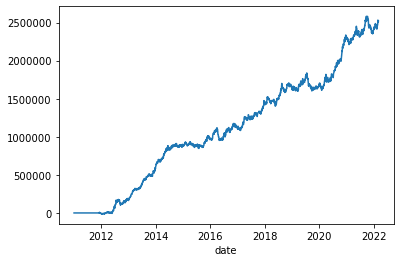

                              0
calmar_ratio_10y       1.117811
calmar_ratio_11y       1.014674
calmar_ratio_1y        1.093363
calmar_ratio_2y        1.883618
calmar_ratio_3y        1.288639
calmar_ratio_4y        1.137180
calmar_ratio_5y        1.229302
calmar_ratio_6m        0.555568
calmar_ratio_6y        1.065938
calmar_ratio_7y        1.034504
calmar_ratio_8y        1.021768
calmar_ratio_9y        1.096653
sharpe_ratio_10y       1.561072
sharpe_ratio_11y       1.485207
sharpe_ratio_1y        1.130172
sharpe_ratio_2y        1.930179
sharpe_ratio_3y        1.406548
sharpe_ratio_4y        1.301288
sharpe_ratio_5y        1.456542
sharpe_ratio_6m        0.534826
sharpe_ratio_6y        1.295031
sharpe_ratio_7y        1.309676
sharpe_ratio_8y        1.335120
sharpe_ratio_9y        1.479525
sortino_ratio_10y      2.302354
sortino_ratio_11y      2.100603
sortino_ratio_1y       1.634061
sortino_ratio_2y       2.974466
sortino_ratio_3y       2.150684
sortino_ratio_4y       1.954164
sortino_

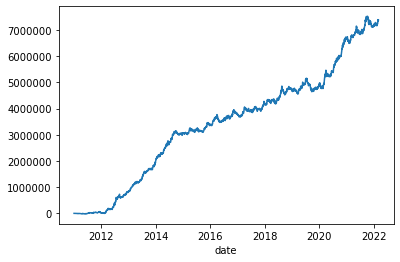

                             0
sharpe_ratio_10y      1.926279
sharpe_ratio_11y      1.841347
sharpe_ratio_1y       1.291355
sharpe_ratio_2y       2.357773
sharpe_ratio_3y       1.842247
sharpe_ratio_4y       1.638073
sharpe_ratio_5y       1.629124
sharpe_ratio_6m       0.712679
sharpe_ratio_6y       1.436999
sharpe_ratio_7y       1.494518
sharpe_ratio_8y       1.601695
sharpe_ratio_9y       1.775447
std_pnl_10y       24906.995488
std_pnl_11y       23805.750162
std_pnl_1y        33069.925425
std_pnl_2y        33514.748009
std_pnl_3y        31732.019824
std_pnl_4y        30324.922892
std_pnl_5y        29068.712539
std_pnl_6m        36155.937323
std_pnl_6y        28276.156576
std_pnl_7y        27125.599170
std_pnl_8y        26426.061847
std_pnl_9y        25686.537601
          0         1         2         3
0  1.000000  0.729741  0.446181  0.546247
1  0.729741  1.000000  0.225404  0.601355
2  0.446181  0.225404  1.000000  0.542358
3  0.546247  0.601355  0.542358  1.000000
combined pnl fo

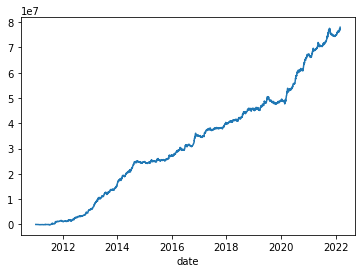

                              0
sharpe_ratio_10y       2.843743
sharpe_ratio_11y       2.745872
sharpe_ratio_1y        2.534475
sharpe_ratio_2y        3.807648
sharpe_ratio_3y        2.970917
sharpe_ratio_4y        2.743646
sharpe_ratio_5y        2.718465
sharpe_ratio_6m        2.351614
sharpe_ratio_6y        2.656435
sharpe_ratio_7y        2.574465
sharpe_ratio_8y        2.612518
sharpe_ratio_9y        2.768738
std_pnl_10y       176297.674126
std_pnl_11y       168855.279018
std_pnl_1y        243548.848680
std_pnl_2y        248485.241714
std_pnl_3y        233898.529962
std_pnl_4y        220726.264710
std_pnl_5y        206997.622235
std_pnl_6m        282168.141860
std_pnl_6y        200891.040174
std_pnl_7y        192278.143232
std_pnl_8y        186629.253929
std_pnl_9y        182851.871505


In [95]:
cutoff_date = datetime.date(2016,1,1)

dpnl_cutoff = []
for dpnl in dpnl_by_scen:
    dpnl_cutoff.append(dpnl[dpnl.index >= cutoff_date])

combo_dpnl = pd.concat(dpnl_cutoff, axis = 1)
combo_dpnl.columns = [ '_'.join([scen[0], scen[1], str(idx)]) for idx, scen in enumerate(scenarios)]
    
combo_dpnl.corr().to_csv(file_folder + "port_corr.csv")
pnl_dict = {}    
for idx, (scen, dpnl) in enumerate(zip(scenarios, dpnl_by_scen)):    
    if scen[0] not in pnl_dict:
        pnl_dict[scen[0]] = {}
    if scen[1] not in pnl_dict[scen[0]]:
        pnl_dict[scen[0]][scen[1]] = pd.Series()
    pnl_dict[scen[0]][scen[1]] = pnl_dict[scen[0]][scen[1]].add(dpnl * scen[2], fill_value = 0)

pnl_by_sim = []
for sim_name in pnl_dict:
    pnl_list = []
    for run_mode in pnl_dict[sim_name]:
        print("sim_name = %s, run_mode = %s" % (sim_name, run_mode))
        pnl_list.append(pnl_dict[sim_name][run_mode])
        cpnl = pnl_dict[sim_name][run_mode].cumsum()        
        cpnl.plot()
        plt.show()
        res_pnl = backtest.pnl_stats_by_tenor(pnl_dict[sim_name][run_mode].dropna(), tenors = pnl_tenors, field = None)
        vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
        vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                       ('calmar' in idx) or ('std' in idx)], :]
        print(vdf)            
    print("corr for sim_name = %s" % sim_name)
    xdf = pd.concat(pnl_list, axis = 1)
    tdf = xdf[xdf.index >= cutoff_date]
    print(tdf.corr())
    print("combined pnl for sim_name = %s" % sim_name)
    adf = xdf.sum(axis=1)
    pnl_by_sim.append(adf)
    adf.cumsum().plot()
    plt.show()
    res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
    vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
    print(vdf)
xdf = pd.concat(pnl_by_sim, axis = 1)
tdf = xdf[xdf.index >= cutoff_date]
print(tdf.corr())
print("combined pnl for sim_name = %s" % sim_name)
adf = xdf.sum(axis=1)
pnl_by_sim.append(adf)
adf.cumsum().plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
print(vdf)

In [13]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    


In [9]:
print(df)

           index  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
0     2011-01-04    2373.0    2386.0   2348.0     2365.0      275428   
1     2011-01-05    2343.0    2360.0   2332.0     2336.0      214902   
2     2011-01-06    2349.0    2368.0   2345.0     2352.0      186136   
3     2011-01-07    2343.0    2371.0   2320.0     2336.0      369032   
4     2011-01-10    2344.0    2394.0   2344.0     2377.0      436038   
...          ...       ...       ...      ...        ...         ...   
2499  2021-04-19    5122.0    5143.0   5058.0     5082.0     2509136   
2500  2021-04-20    5091.0    5171.0   5070.0     5165.0     2137195   
2501  2021-04-21    5158.0    5189.0   5125.0     5188.0     2026507   
2502  2021-04-22    5195.0    5238.0   5175.0     5208.0     2569897   
2503  2021-04-23    5225.0    5300.0   5205.0     5299.0     2115301   

      rb1-openInterest rb1-contract  rb1-shift  rb1-contmth  ...  AP2-open  \
0               576934       rb1105    -2457.0       2011

In [34]:
pnl_tenors

['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '11y']

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


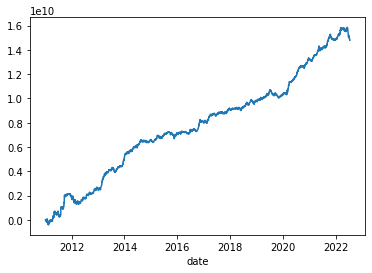

                   tscarry-ryieldnmb-commod_mkts-1-5-1-0.2
calmar_ratio_10y                              1.259017e+00
calmar_ratio_11y                              1.266801e+00
calmar_ratio_1y                               5.873939e-01
calmar_ratio_2y                               1.336560e+00
calmar_ratio_3y                               1.326594e+00
calmar_ratio_4y                               1.317172e+00
calmar_ratio_5y                               1.170283e+00
calmar_ratio_6y                               1.184729e+00
calmar_ratio_7y                               1.061537e+00
calmar_ratio_8y                               1.033230e+00
calmar_ratio_9y                               1.132824e+00
sharpe_ratio_10y                              2.196688e+00
sharpe_ratio_11y                              2.017607e+00
sharpe_ratio_1y                               7.490340e-01
sharpe_ratio_2y                               1.956017e+00
sharpe_ratio_3y                               2.054249e+

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


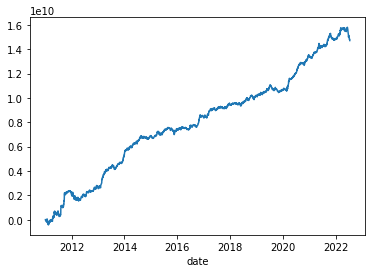

                   tscarry-ryieldnmb-commod_mkts-1-5-2-0.2
calmar_ratio_10y                              1.215253e+00
calmar_ratio_11y                              1.237145e+00
calmar_ratio_1y                               4.226739e-01
calmar_ratio_2y                               1.170182e+00
calmar_ratio_3y                               1.163557e+00
calmar_ratio_4y                               1.193137e+00
calmar_ratio_5y                               1.057967e+00
calmar_ratio_6y                               1.102002e+00
calmar_ratio_7y                               9.917622e-01
calmar_ratio_8y                               9.703154e-01
calmar_ratio_9y                               1.086118e+00
sharpe_ratio_10y                              2.168061e+00
sharpe_ratio_11y                              2.005879e+00
sharpe_ratio_1y                               5.507664e-01
sharpe_ratio_2y                               1.746177e+00
sharpe_ratio_3y                               1.832612e+

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


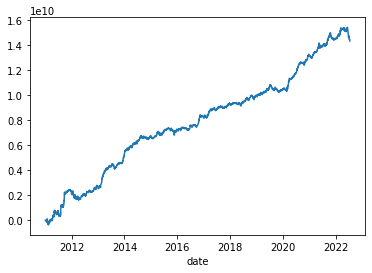

                   tscarry-ryieldnmb-commod_mkts-1-5-3-0.2
calmar_ratio_10y                              1.169481e+00
calmar_ratio_11y                              1.192868e+00
calmar_ratio_1y                               3.382087e-01
calmar_ratio_2y                               1.101638e+00
calmar_ratio_3y                               1.110184e+00
calmar_ratio_4y                               1.141167e+00
calmar_ratio_5y                               1.014192e+00
calmar_ratio_6y                               1.061348e+00
calmar_ratio_7y                               9.584095e-01
calmar_ratio_8y                               9.353875e-01
calmar_ratio_9y                               1.036867e+00
sharpe_ratio_10y                              2.097365e+00
sharpe_ratio_11y                              1.940482e+00
sharpe_ratio_1y                               4.450738e-01
sharpe_ratio_2y                               1.657571e+00
sharpe_ratio_3y                               1.754704e+

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


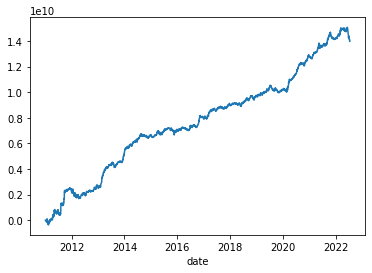

                   tscarry-ryieldnmb-commod_mkts-1-5-4-0.2
calmar_ratio_10y                              1.138113e+00
calmar_ratio_11y                              1.155536e+00
calmar_ratio_1y                               3.077349e-01
calmar_ratio_2y                               1.096738e+00
calmar_ratio_3y                               1.088814e+00
calmar_ratio_4y                               1.117367e+00
calmar_ratio_5y                               9.927482e-01
calmar_ratio_6y                               1.037243e+00
calmar_ratio_7y                               9.313332e-01
calmar_ratio_8y                               8.935433e-01
calmar_ratio_9y                               9.991503e-01
sharpe_ratio_10y                              2.045817e+00
sharpe_ratio_11y                              1.877726e+00
sharpe_ratio_1y                               4.072772e-01
sharpe_ratio_2y                               1.655621e+00
sharpe_ratio_3y                               1.724426e+

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


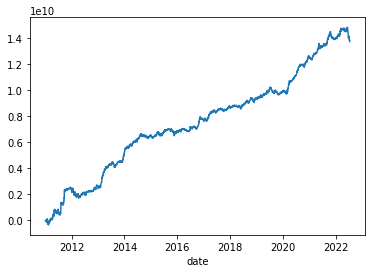

                   tscarry-ryieldnmb-commod_mkts-1-5-5-0.2
calmar_ratio_10y                              1.113243e+00
calmar_ratio_11y                              1.129215e+00
calmar_ratio_1y                               3.014920e-01
calmar_ratio_2y                               1.118797e+00
calmar_ratio_3y                               1.108213e+00
calmar_ratio_4y                               1.134664e+00
calmar_ratio_5y                               9.963060e-01
calmar_ratio_6y                               1.030469e+00
calmar_ratio_7y                               9.213329e-01
calmar_ratio_8y                               8.735765e-01
calmar_ratio_9y                               9.753629e-01
sharpe_ratio_10y                              2.008626e+00
sharpe_ratio_11y                              1.836087e+00
sharpe_ratio_1y                               3.997103e-01
sharpe_ratio_2y                               1.690627e+00
sharpe_ratio_3y                               1.754330e+

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


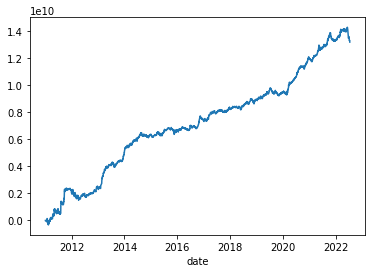

                   tscarry-ryieldnmb-commod_mkts-1-5-10-0.2
calmar_ratio_10y                               1.080028e+00
calmar_ratio_11y                               1.080989e+00
calmar_ratio_1y                                3.522229e-01
calmar_ratio_2y                                1.113033e+00
calmar_ratio_3y                                1.074501e+00
calmar_ratio_4y                                1.098654e+00
calmar_ratio_5y                                9.668698e-01
calmar_ratio_6y                                9.734926e-01
calmar_ratio_7y                                8.791936e-01
calmar_ratio_8y                                8.293674e-01
calmar_ratio_9y                                9.398374e-01
sharpe_ratio_10y                               1.986238e+00
sharpe_ratio_11y                               1.780416e+00
sharpe_ratio_1y                                4.729925e-01
sharpe_ratio_2y                                1.699284e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


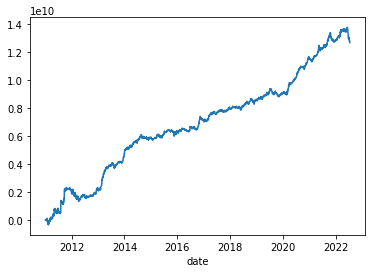

                   tscarry-ryieldnmb-commod_mkts-1-5-15-0.2
calmar_ratio_10y                               1.048760e+00
calmar_ratio_11y                               1.042889e+00
calmar_ratio_1y                                3.446467e-01
calmar_ratio_2y                                1.078265e+00
calmar_ratio_3y                                1.041835e+00
calmar_ratio_4y                                1.060649e+00
calmar_ratio_5y                                9.382864e-01
calmar_ratio_6y                                9.495825e-01
calmar_ratio_7y                                8.657727e-01
calmar_ratio_8y                                8.170514e-01
calmar_ratio_9y                                9.103322e-01
sharpe_ratio_10y                               1.958200e+00
sharpe_ratio_11y                               1.741554e+00
sharpe_ratio_1y                                4.653223e-01
sharpe_ratio_2y                                1.656084e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


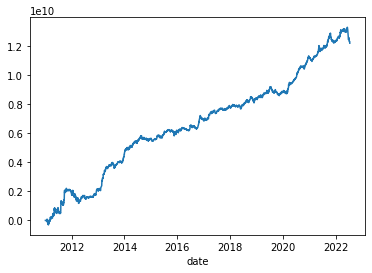

                   tscarry-ryieldnmb-commod_mkts-1-5-20-0.2
calmar_ratio_10y                               1.007966e+00
calmar_ratio_11y                               9.980396e-01
calmar_ratio_1y                                3.376761e-01
calmar_ratio_2y                                1.015720e+00
calmar_ratio_3y                                9.475462e-01
calmar_ratio_4y                                9.866291e-01
calmar_ratio_5y                                8.783264e-01
calmar_ratio_6y                                8.917877e-01
calmar_ratio_7y                                8.257377e-01
calmar_ratio_8y                                7.847038e-01
calmar_ratio_9y                                8.685383e-01
sharpe_ratio_10y                               1.917003e+00
sharpe_ratio_11y                               1.697188e+00
sharpe_ratio_1y                                4.590151e-01
sharpe_ratio_2y                                1.574174e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


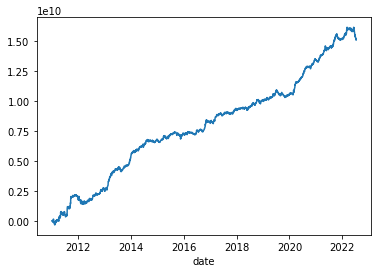

                   tscarry-ryieldnmb-commod_mkts-1-10-1-0.2
calmar_ratio_10y                               1.299547e+00
calmar_ratio_11y                               1.298153e+00
calmar_ratio_1y                                6.258557e-01
calmar_ratio_2y                                1.393754e+00
calmar_ratio_3y                                1.365685e+00
calmar_ratio_4y                                1.350197e+00
calmar_ratio_5y                                1.200370e+00
calmar_ratio_6y                                1.222220e+00
calmar_ratio_7y                                1.094097e+00
calmar_ratio_8y                                1.051989e+00
calmar_ratio_9y                                1.153794e+00
sharpe_ratio_10y                               2.233587e+00
sharpe_ratio_11y                               2.055390e+00
sharpe_ratio_1y                                7.837224e-01
sharpe_ratio_2y                                2.005549e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


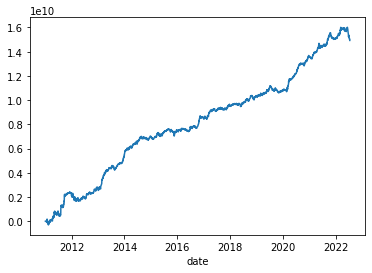

                   tscarry-ryieldnmb-commod_mkts-1-10-2-0.2
calmar_ratio_10y                               1.245194e+00
calmar_ratio_11y                               1.248474e+00
calmar_ratio_1y                                4.237503e-01
calmar_ratio_2y                                1.205446e+00
calmar_ratio_3y                                1.197960e+00
calmar_ratio_4y                                1.217874e+00
calmar_ratio_5y                                1.085713e+00
calmar_ratio_6y                                1.131394e+00
calmar_ratio_7y                                1.019053e+00
calmar_ratio_8y                                9.829201e-01
calmar_ratio_9y                                1.100286e+00
sharpe_ratio_10y                               2.197474e+00
sharpe_ratio_11y                               2.017838e+00
sharpe_ratio_1y                                5.435239e-01
sharpe_ratio_2y                                1.775601e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


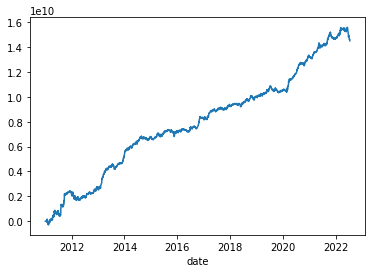

                   tscarry-ryieldnmb-commod_mkts-1-10-3-0.2
calmar_ratio_10y                               1.198287e+00
calmar_ratio_11y                               1.205581e+00
calmar_ratio_1y                                3.373807e-01
calmar_ratio_2y                                1.144448e+00
calmar_ratio_3y                                1.155685e+00
calmar_ratio_4y                                1.172687e+00
calmar_ratio_5y                                1.048909e+00
calmar_ratio_6y                                1.098107e+00
calmar_ratio_7y                                9.886334e-01
calmar_ratio_8y                                9.496358e-01
calmar_ratio_9y                                1.051987e+00
sharpe_ratio_10y                               2.123273e+00
sharpe_ratio_11y                               1.950733e+00
sharpe_ratio_1y                                4.364585e-01
sharpe_ratio_2y                                1.696448e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


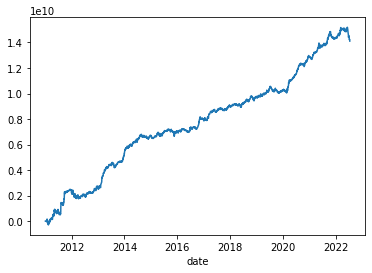

                   tscarry-ryieldnmb-commod_mkts-1-10-4-0.2
calmar_ratio_10y                               1.165319e+00
calmar_ratio_11y                               1.169863e+00
calmar_ratio_1y                                3.091763e-01
calmar_ratio_2y                                1.138985e+00
calmar_ratio_3y                                1.133665e+00
calmar_ratio_4y                                1.152805e+00
calmar_ratio_5y                                1.029851e+00
calmar_ratio_6y                                1.074648e+00
calmar_ratio_7y                                9.621883e-01
calmar_ratio_8y                                9.090372e-01
calmar_ratio_9y                                1.014217e+00
sharpe_ratio_10y                               2.064887e+00
sharpe_ratio_11y                               1.885504e+00
sharpe_ratio_1y                                4.014703e-01
sharpe_ratio_2y                                1.690755e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


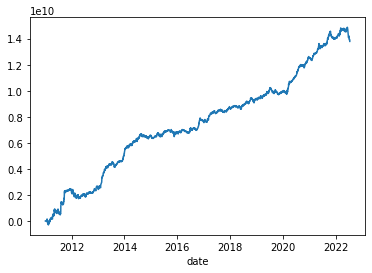

                   tscarry-ryieldnmb-commod_mkts-1-10-5-0.2
calmar_ratio_10y                               1.138812e+00
calmar_ratio_11y                               1.142399e+00
calmar_ratio_1y                                3.138552e-01
calmar_ratio_2y                                1.158580e+00
calmar_ratio_3y                                1.137747e+00
calmar_ratio_4y                                1.159745e+00
calmar_ratio_5y                                1.026878e+00
calmar_ratio_6y                                1.062154e+00
calmar_ratio_7y                                9.454565e-01
calmar_ratio_8y                                8.831103e-01
calmar_ratio_9y                                9.877889e-01
sharpe_ratio_10y                               2.027151e+00
sharpe_ratio_11y                               1.842374e+00
sharpe_ratio_1y                                4.089501e-01
sharpe_ratio_2y                                1.723414e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


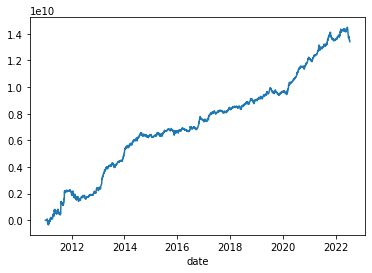

                   tscarry-ryieldnmb-commod_mkts-1-10-10-0.2
calmar_ratio_10y                                1.127475e+00
calmar_ratio_11y                                1.120247e+00
calmar_ratio_1y                                 3.804934e-01
calmar_ratio_2y                                 1.157984e+00
calmar_ratio_3y                                 1.113380e+00
calmar_ratio_4y                                 1.136717e+00
calmar_ratio_5y                                 1.007305e+00
calmar_ratio_6y                                 1.022205e+00
calmar_ratio_7y                                 9.180867e-01
calmar_ratio_8y                                 8.560495e-01
calmar_ratio_9y                                 9.755932e-01
sharpe_ratio_10y                                2.038481e+00
sharpe_ratio_11y                                1.819719e+00
sharpe_ratio_1y                                 5.042701e-01
sharpe_ratio_2y                                 1.742126e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


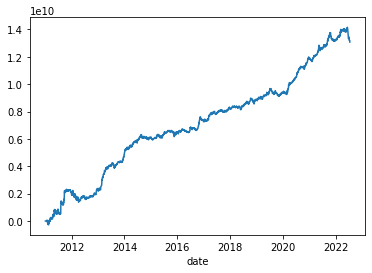

                   tscarry-ryieldnmb-commod_mkts-1-10-15-0.2
calmar_ratio_10y                                1.099410e+00
calmar_ratio_11y                                1.090449e+00
calmar_ratio_1y                                 3.885367e-01
calmar_ratio_2y                                 1.129499e+00
calmar_ratio_3y                                 1.090781e+00
calmar_ratio_4y                                 1.104834e+00
calmar_ratio_5y                                 9.824970e-01
calmar_ratio_6y                                 9.997601e-01
calmar_ratio_7y                                 9.080775e-01
calmar_ratio_8y                                 8.501411e-01
calmar_ratio_9y                                 9.480805e-01
sharpe_ratio_10y                                2.020174e+00
sharpe_ratio_11y                                1.794193e+00
sharpe_ratio_1y                                 5.175822e-01
sharpe_ratio_2y                                 1.709862e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


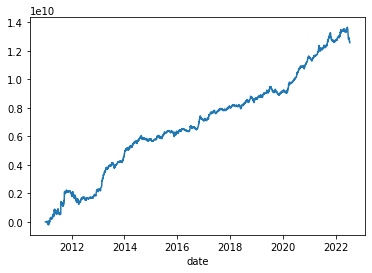

                   tscarry-ryieldnmb-commod_mkts-1-10-20-0.2
calmar_ratio_10y                                1.054499e+00
calmar_ratio_11y                                1.041575e+00
calmar_ratio_1y                                 3.706470e-01
calmar_ratio_2y                                 1.058582e+00
calmar_ratio_3y                                 9.867812e-01
calmar_ratio_4y                                 1.026445e+00
calmar_ratio_5y                                 9.184583e-01
calmar_ratio_6y                                 9.374392e-01
calmar_ratio_7y                                 8.648022e-01
calmar_ratio_8y                                 8.162488e-01
calmar_ratio_9y                                 9.017618e-01
sharpe_ratio_10y                                1.976380e+00
sharpe_ratio_11y                                1.746634e+00
sharpe_ratio_1y                                 4.975432e-01
sharpe_ratio_2y                                 1.620490e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


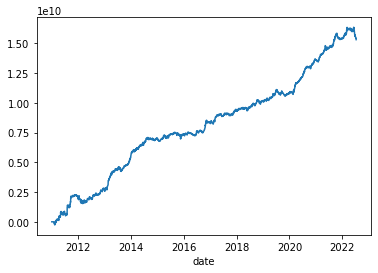

                   tscarry-ryieldnmb-commod_mkts-1-20-1-0.2
calmar_ratio_10y                               1.335272e+00
calmar_ratio_11y                               1.331867e+00
calmar_ratio_1y                                6.416690e-01
calmar_ratio_2y                                1.459480e+00
calmar_ratio_3y                                1.402774e+00
calmar_ratio_4y                                1.409562e+00
calmar_ratio_5y                                1.256446e+00
calmar_ratio_6y                                1.274491e+00
calmar_ratio_7y                                1.129273e+00
calmar_ratio_8y                                1.065774e+00
calmar_ratio_9y                                1.190823e+00
sharpe_ratio_10y                               2.235293e+00
sharpe_ratio_11y                               2.054466e+00
sharpe_ratio_1y                                7.905205e-01
sharpe_ratio_2y                                2.053453e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


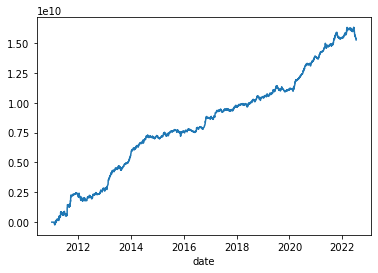

                   tscarry-ryieldnmb-commod_mkts-1-20-2-0.2
calmar_ratio_10y                               1.298196e+00
calmar_ratio_11y                               1.300881e+00
calmar_ratio_1y                                4.640723e-01
calmar_ratio_2y                                1.290027e+00
calmar_ratio_3y                                1.256779e+00
calmar_ratio_4y                                1.287915e+00
calmar_ratio_5y                                1.151503e+00
calmar_ratio_6y                                1.194848e+00
calmar_ratio_7y                                1.068176e+00
calmar_ratio_8y                                1.015204e+00
calmar_ratio_9y                                1.152524e+00
sharpe_ratio_10y                               2.224452e+00
sharpe_ratio_11y                               2.042527e+00
sharpe_ratio_1y                                5.857519e-01
sharpe_ratio_2y                                1.857551e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


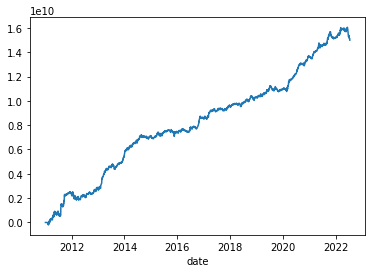

                   tscarry-ryieldnmb-commod_mkts-1-20-3-0.2
calmar_ratio_10y                               1.262482e+00
calmar_ratio_11y                               1.274895e+00
calmar_ratio_1y                                3.965328e-01
calmar_ratio_2y                                1.242227e+00
calmar_ratio_3y                                1.226727e+00
calmar_ratio_4y                                1.251375e+00
calmar_ratio_5y                                1.118989e+00
calmar_ratio_6y                                1.166285e+00
calmar_ratio_7y                                1.046249e+00
calmar_ratio_8y                                9.941101e-01
calmar_ratio_9y                                1.114577e+00
sharpe_ratio_10y                               2.163782e+00
sharpe_ratio_11y                               1.995310e+00
sharpe_ratio_1y                                5.026768e-01
sharpe_ratio_2y                                1.791944e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


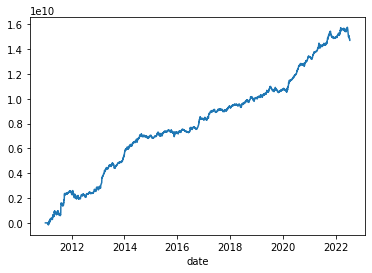

                   tscarry-ryieldnmb-commod_mkts-1-20-4-0.2
calmar_ratio_10y                               1.241940e+00
calmar_ratio_11y                               1.252299e+00
calmar_ratio_1y                                3.853856e-01
calmar_ratio_2y                                1.240232e+00
calmar_ratio_3y                                1.223476e+00
calmar_ratio_4y                                1.245637e+00
calmar_ratio_5y                                1.111925e+00
calmar_ratio_6y                                1.153935e+00
calmar_ratio_7y                                1.033809e+00
calmar_ratio_8y                                9.695632e-01
calmar_ratio_9y                                1.087699e+00
sharpe_ratio_10y                               2.123802e+00
sharpe_ratio_11y                               1.947893e+00
sharpe_ratio_1y                                4.902008e-01
sharpe_ratio_2y                                1.789076e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


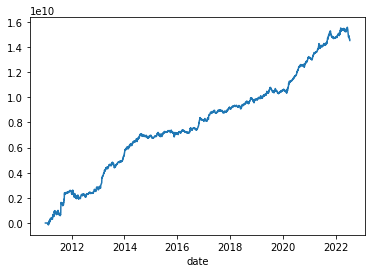

                   tscarry-ryieldnmb-commod_mkts-1-20-5-0.2
calmar_ratio_10y                               1.226139e+00
calmar_ratio_11y                               1.235535e+00
calmar_ratio_1y                                3.954456e-01
calmar_ratio_2y                                1.259511e+00
calmar_ratio_3y                                1.233204e+00
calmar_ratio_4y                                1.254251e+00
calmar_ratio_5y                                1.112640e+00
calmar_ratio_6y                                1.148122e+00
calmar_ratio_7y                                1.025590e+00
calmar_ratio_8y                                9.530825e-01
calmar_ratio_9y                                1.068899e+00
sharpe_ratio_10y                               2.101533e+00
sharpe_ratio_11y                               1.918612e+00
sharpe_ratio_1y                                5.040439e-01
sharpe_ratio_2y                                1.817894e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


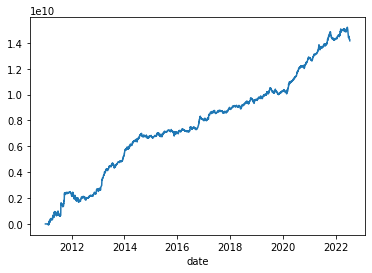

                   tscarry-ryieldnmb-commod_mkts-1-20-10-0.2
calmar_ratio_10y                                1.214097e+00
calmar_ratio_11y                                1.210449e+00
calmar_ratio_1y                                 4.465028e-01
calmar_ratio_2y                                 1.246826e+00
calmar_ratio_3y                                 1.206912e+00
calmar_ratio_4y                                 1.218328e+00
calmar_ratio_5y                                 1.084635e+00
calmar_ratio_6y                                 1.103363e+00
calmar_ratio_7y                                 9.957137e-01
calmar_ratio_8y                                 9.294260e-01
calmar_ratio_9y                                 1.049456e+00
sharpe_ratio_10y                                2.110895e+00
sharpe_ratio_11y                                1.893512e+00
sharpe_ratio_1y                                 5.763174e-01
sharpe_ratio_2y                                 1.819236e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


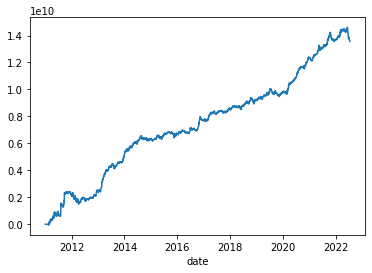

                   tscarry-ryieldnmb-commod_mkts-1-20-15-0.2
calmar_ratio_10y                                1.162975e+00
calmar_ratio_11y                                1.154735e+00
calmar_ratio_1y                                 4.413383e-01
calmar_ratio_2y                                 1.205646e+00
calmar_ratio_3y                                 1.159408e+00
calmar_ratio_4y                                 1.162222e+00
calmar_ratio_5y                                 1.035975e+00
calmar_ratio_6y                                 1.058000e+00
calmar_ratio_7y                                 9.647620e-01
calmar_ratio_8y                                 9.039067e-01
calmar_ratio_9y                                 1.001236e+00
sharpe_ratio_10y                                2.070079e+00
sharpe_ratio_11y                                1.844010e+00
sharpe_ratio_1y                                 5.749669e-01
sharpe_ratio_2y                                 1.781818e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


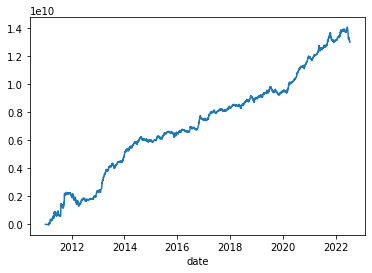

                   tscarry-ryieldnmb-commod_mkts-1-20-20-0.2
calmar_ratio_10y                                1.099711e+00
calmar_ratio_11y                                1.089521e+00
calmar_ratio_1y                                 4.048482e-01
calmar_ratio_2y                                 1.115360e+00
calmar_ratio_3y                                 1.033061e+00
calmar_ratio_4y                                 1.062822e+00
calmar_ratio_5y                                 9.553366e-01
calmar_ratio_6y                                 9.783011e-01
calmar_ratio_7y                                 9.030825e-01
calmar_ratio_8y                                 8.538014e-01
calmar_ratio_9y                                 9.402871e-01
sharpe_ratio_10y                                2.021837e+00
sharpe_ratio_11y                                1.794820e+00
sharpe_ratio_1y                                 5.366804e-01
sharpe_ratio_2y                                 1.686133e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


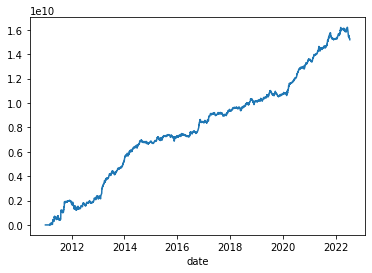

                   tscarry-ryieldnmb-commod_mkts-1-40-1-0.2
calmar_ratio_10y                               1.380358e+00
calmar_ratio_11y                               1.360239e+00
calmar_ratio_1y                                6.907096e-01
calmar_ratio_2y                                1.478738e+00
calmar_ratio_3y                                1.420778e+00
calmar_ratio_4y                                1.390851e+00
calmar_ratio_5y                                1.234027e+00
calmar_ratio_6y                                1.280701e+00
calmar_ratio_7y                                1.144294e+00
calmar_ratio_8y                                1.089427e+00
calmar_ratio_9y                                1.221371e+00
sharpe_ratio_10y                               2.255659e+00
sharpe_ratio_11y                               2.059203e+00
sharpe_ratio_1y                                8.369740e-01
sharpe_ratio_2y                                2.059265e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


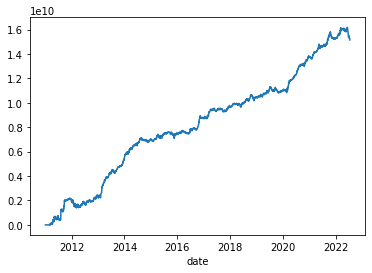

                   tscarry-ryieldnmb-commod_mkts-1-40-2-0.2
calmar_ratio_10y                               1.343256e+00
calmar_ratio_11y                               1.328755e+00
calmar_ratio_1y                                5.030239e-01
calmar_ratio_2y                                1.313165e+00
calmar_ratio_3y                                1.276820e+00
calmar_ratio_4y                                1.276886e+00
calmar_ratio_5y                                1.132958e+00
calmar_ratio_6y                                1.207240e+00
calmar_ratio_7y                                1.085701e+00
calmar_ratio_8y                                1.040775e+00
calmar_ratio_9y                                1.181007e+00
sharpe_ratio_10y                               2.250152e+00
sharpe_ratio_11y                               2.049104e+00
sharpe_ratio_1y                                6.256812e-01
sharpe_ratio_2y                                1.874914e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


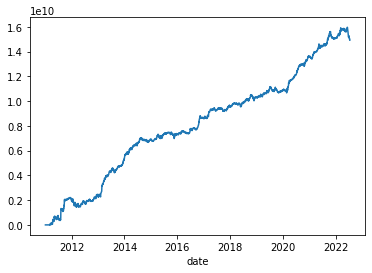

                   tscarry-ryieldnmb-commod_mkts-1-40-3-0.2
calmar_ratio_10y                               1.311716e+00
calmar_ratio_11y                               1.305999e+00
calmar_ratio_1y                                4.466997e-01
calmar_ratio_2y                                1.278664e+00
calmar_ratio_3y                                1.249531e+00
calmar_ratio_4y                                1.244284e+00
calmar_ratio_5y                                1.103959e+00
calmar_ratio_6y                                1.183687e+00
calmar_ratio_7y                                1.068015e+00
calmar_ratio_8y                                1.021652e+00
calmar_ratio_9y                                1.147359e+00
sharpe_ratio_10y                               2.200954e+00
sharpe_ratio_11y                               2.010427e+00
sharpe_ratio_1y                                5.582435e-01
sharpe_ratio_2y                                1.830938e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


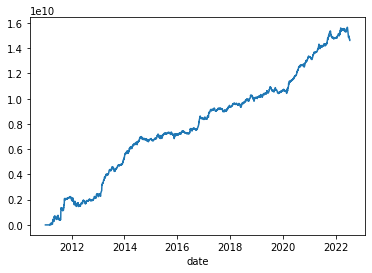

                   tscarry-ryieldnmb-commod_mkts-1-40-4-0.2
calmar_ratio_10y                               1.287468e+00
calmar_ratio_11y                               1.282216e+00
calmar_ratio_1y                                4.325494e-01
calmar_ratio_2y                                1.275158e+00
calmar_ratio_3y                                1.232186e+00
calmar_ratio_4y                                1.227736e+00
calmar_ratio_5y                                1.087879e+00
calmar_ratio_6y                                1.164737e+00
calmar_ratio_7y                                1.050566e+00
calmar_ratio_8y                                9.929437e-01
calmar_ratio_9y                                1.115370e+00
sharpe_ratio_10y                               2.159623e+00
sharpe_ratio_11y                               1.965609e+00
sharpe_ratio_1y                                5.430623e-01
sharpe_ratio_2y                                1.828338e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


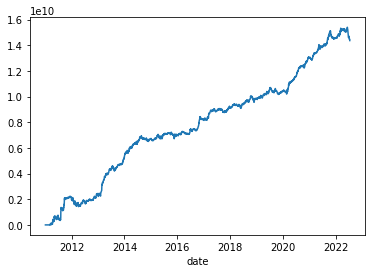

                   tscarry-ryieldnmb-commod_mkts-1-40-5-0.2
calmar_ratio_10y                               1.265979e+00
calmar_ratio_11y                               1.261203e+00
calmar_ratio_1y                                4.371109e-01
calmar_ratio_2y                                1.286287e+00
calmar_ratio_3y                                1.225853e+00
calmar_ratio_4y                                1.223753e+00
calmar_ratio_5y                                1.077394e+00
calmar_ratio_6y                                1.151275e+00
calmar_ratio_7y                                1.036399e+00
calmar_ratio_8y                                9.716680e-01
calmar_ratio_9y                                1.091570e+00
sharpe_ratio_10y                               2.130613e+00
sharpe_ratio_11y                               1.933623e+00
sharpe_ratio_1y                                5.494929e-01
sharpe_ratio_2y                                1.847318e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


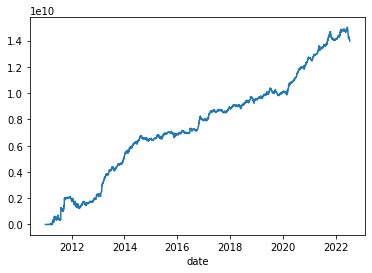

                   tscarry-ryieldnmb-commod_mkts-1-40-10-0.2
calmar_ratio_10y                                1.234796e+00
calmar_ratio_11y                                1.221118e+00
calmar_ratio_1y                                 4.683407e-01
calmar_ratio_2y                                 1.265447e+00
calmar_ratio_3y                                 1.191915e+00
calmar_ratio_4y                                 1.186711e+00
calmar_ratio_5y                                 1.048571e+00
calmar_ratio_6y                                 1.104050e+00
calmar_ratio_7y                                 9.977217e-01
calmar_ratio_8y                                 9.361610e-01
calmar_ratio_9y                                 1.060335e+00
sharpe_ratio_10y                                2.127516e+00
sharpe_ratio_11y                                1.904664e+00
sharpe_ratio_1y                                 6.023553e-01
sharpe_ratio_2y                                 1.861190e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


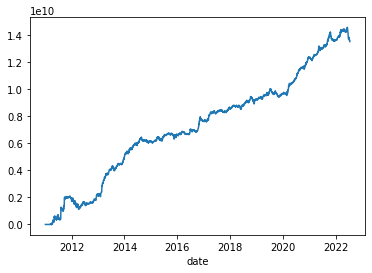

                   tscarry-ryieldnmb-commod_mkts-1-40-15-0.2
calmar_ratio_10y                                1.184087e+00
calmar_ratio_11y                                1.168261e+00
calmar_ratio_1y                                 4.510908e-01
calmar_ratio_2y                                 1.222595e+00
calmar_ratio_3y                                 1.149253e+00
calmar_ratio_4y                                 1.140914e+00
calmar_ratio_5y                                 1.012596e+00
calmar_ratio_6y                                 1.064969e+00
calmar_ratio_7y                                 9.691888e-01
calmar_ratio_8y                                 9.108486e-01
calmar_ratio_9y                                 1.010435e+00
sharpe_ratio_10y                                2.089321e+00
sharpe_ratio_11y                                1.861909e+00
sharpe_ratio_1y                                 5.868336e-01
sharpe_ratio_2y                                 1.828186e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


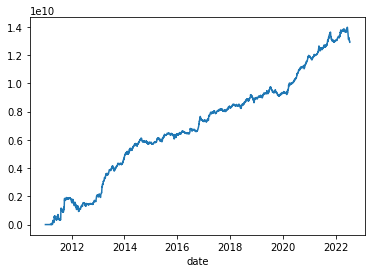

                   tscarry-ryieldnmb-commod_mkts-1-40-20-0.2
calmar_ratio_10y                                1.122529e+00
calmar_ratio_11y                                1.106621e+00
calmar_ratio_1y                                 3.934131e-01
calmar_ratio_2y                                 1.129780e+00
calmar_ratio_3y                                 1.032792e+00
calmar_ratio_4y                                 1.050501e+00
calmar_ratio_5y                                 9.443889e-01
calmar_ratio_6y                                 9.938165e-01
calmar_ratio_7y                                 9.130828e-01
calmar_ratio_8y                                 8.655110e-01
calmar_ratio_9y                                 9.545074e-01
sharpe_ratio_10y                                2.036193e+00
sharpe_ratio_11y                                1.811717e+00
sharpe_ratio_1y                                 5.199725e-01
sharpe_ratio_2y                                 1.722491e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


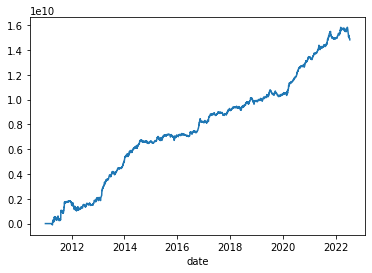

                   tscarry-ryieldnmb-commod_mkts-1-60-1-0.2
calmar_ratio_10y                               1.374554e+00
calmar_ratio_11y                               1.348940e+00
calmar_ratio_1y                                5.810766e-01
calmar_ratio_2y                                1.406465e+00
calmar_ratio_3y                                1.389679e+00
calmar_ratio_4y                                1.361670e+00
calmar_ratio_5y                                1.209408e+00
calmar_ratio_6y                                1.266685e+00
calmar_ratio_7y                                1.125738e+00
calmar_ratio_8y                                1.080220e+00
calmar_ratio_9y                                1.217812e+00
sharpe_ratio_10y                               2.242731e+00
sharpe_ratio_11y                               2.034865e+00
sharpe_ratio_1y                                7.066385e-01
sharpe_ratio_2y                                1.982508e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


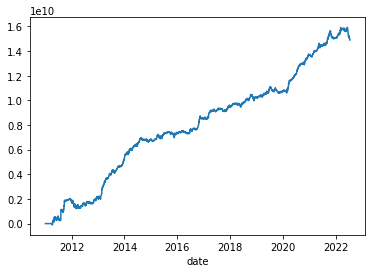

                   tscarry-ryieldnmb-commod_mkts-1-60-2-0.2
calmar_ratio_10y                               1.346382e+00
calmar_ratio_11y                               1.329565e+00
calmar_ratio_1y                                4.400128e-01
calmar_ratio_2y                                1.280963e+00
calmar_ratio_3y                                1.278703e+00
calmar_ratio_4y                                1.270658e+00
calmar_ratio_5y                                1.132202e+00
calmar_ratio_6y                                1.211716e+00
calmar_ratio_7y                                1.081832e+00
calmar_ratio_8y                                1.043631e+00
calmar_ratio_9y                                1.187544e+00
sharpe_ratio_10y                               2.249301e+00
sharpe_ratio_11y                               2.039380e+00
sharpe_ratio_1y                                5.480198e-01
sharpe_ratio_2y                                1.848062e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


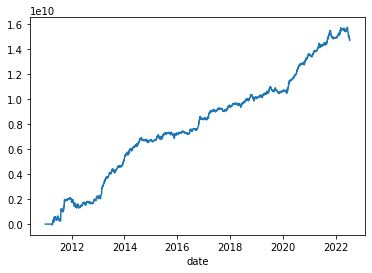

                   tscarry-ryieldnmb-commod_mkts-1-60-3-0.2
calmar_ratio_10y                               1.315168e+00
calmar_ratio_11y                               1.305720e+00
calmar_ratio_1y                                3.891054e-01
calmar_ratio_2y                                1.250026e+00
calmar_ratio_3y                                1.250836e+00
calmar_ratio_4y                                1.243065e+00
calmar_ratio_5y                                1.108278e+00
calmar_ratio_6y                                1.191402e+00
calmar_ratio_7y                                1.067132e+00
calmar_ratio_8y                                1.027021e+00
calmar_ratio_9y                                1.156170e+00
sharpe_ratio_10y                               2.198784e+00
sharpe_ratio_11y                               1.996356e+00
sharpe_ratio_1y                                4.862791e-01
sharpe_ratio_2y                                1.807974e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


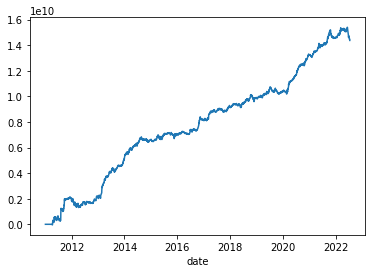

                   tscarry-ryieldnmb-commod_mkts-1-60-4-0.2
calmar_ratio_10y                               1.288222e+00
calmar_ratio_11y                               1.280996e+00
calmar_ratio_1y                                3.655696e-01
calmar_ratio_2y                                1.249603e+00
calmar_ratio_3y                                1.230780e+00
calmar_ratio_4y                                1.226189e+00
calmar_ratio_5y                                1.091971e+00
calmar_ratio_6y                                1.172614e+00
calmar_ratio_7y                                1.050539e+00
calmar_ratio_8y                                1.000315e+00
calmar_ratio_9y                                1.125475e+00
sharpe_ratio_10y                               2.153103e+00
sharpe_ratio_11y                               1.949923e+00
sharpe_ratio_1y                                4.589737e-01
sharpe_ratio_2y                                1.810310e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


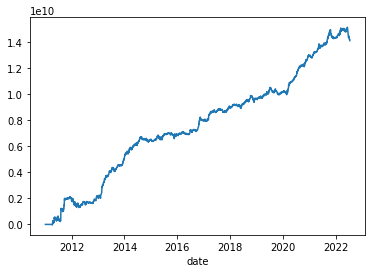

                   tscarry-ryieldnmb-commod_mkts-1-60-5-0.2
calmar_ratio_10y                               1.265942e+00
calmar_ratio_11y                               1.260299e+00
calmar_ratio_1y                                3.693267e-01
calmar_ratio_2y                                1.259824e+00
calmar_ratio_3y                                1.215953e+00
calmar_ratio_4y                                1.213724e+00
calmar_ratio_5y                                1.075821e+00
calmar_ratio_6y                                1.155151e+00
calmar_ratio_7y                                1.033814e+00
calmar_ratio_8y                                9.767577e-01
calmar_ratio_9y                                1.100647e+00
sharpe_ratio_10y                               2.119924e+00
sharpe_ratio_11y                               1.915803e+00
sharpe_ratio_1y                                4.642550e-01
sharpe_ratio_2y                                1.826864e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


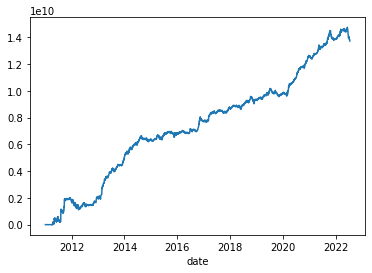

                   tscarry-ryieldnmb-commod_mkts-1-60-10-0.2
calmar_ratio_10y                                1.244622e+00
calmar_ratio_11y                                1.232197e+00
calmar_ratio_1y                                 4.084101e-01
calmar_ratio_2y                                 1.264671e+00
calmar_ratio_3y                                 1.200966e+00
calmar_ratio_4y                                 1.192380e+00
calmar_ratio_5y                                 1.058700e+00
calmar_ratio_6y                                 1.112039e+00
calmar_ratio_7y                                 9.976961e-01
calmar_ratio_8y                                 9.449194e-01
calmar_ratio_9y                                 1.076832e+00
sharpe_ratio_10y                                2.111263e+00
sharpe_ratio_11y                                1.886147e+00
sharpe_ratio_1y                                 5.231999e-01
sharpe_ratio_2y                                 1.862039e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


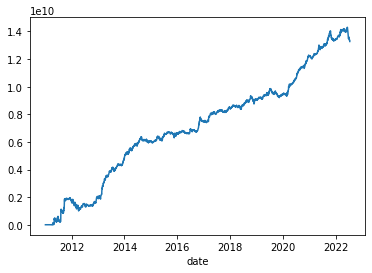

                   tscarry-ryieldnmb-commod_mkts-1-60-15-0.2
calmar_ratio_10y                                1.197710e+00
calmar_ratio_11y                                1.186060e+00
calmar_ratio_1y                                 3.875921e-01
calmar_ratio_2y                                 1.224121e+00
calmar_ratio_3y                                 1.148611e+00
calmar_ratio_4y                                 1.141171e+00
calmar_ratio_5y                                 1.019760e+00
calmar_ratio_6y                                 1.068575e+00
calmar_ratio_7y                                 9.627297e-01
calmar_ratio_8y                                 9.167292e-01
calmar_ratio_9y                                 1.027150e+00
sharpe_ratio_10y                                2.072037e+00
sharpe_ratio_11y                                1.849058e+00
sharpe_ratio_1y                                 5.031387e-01
sharpe_ratio_2y                                 1.826832e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


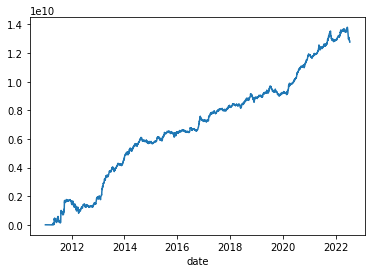

                   tscarry-ryieldnmb-commod_mkts-1-60-20-0.2
calmar_ratio_10y                                1.144364e+00
calmar_ratio_11y                                1.134537e+00
calmar_ratio_1y                                 3.403661e-01
calmar_ratio_2y                                 1.133815e+00
calmar_ratio_3y                                 1.030056e+00
calmar_ratio_4y                                 1.052806e+00
calmar_ratio_5y                                 9.535087e-01
calmar_ratio_6y                                 9.990754e-01
calmar_ratio_7y                                 9.091501e-01
calmar_ratio_8y                                 8.759003e-01
calmar_ratio_9y                                 9.761871e-01
sharpe_ratio_10y                                2.028298e+00
sharpe_ratio_11y                                1.813030e+00
sharpe_ratio_1y                                 4.490694e-01
sharpe_ratio_2y                                 1.721561e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


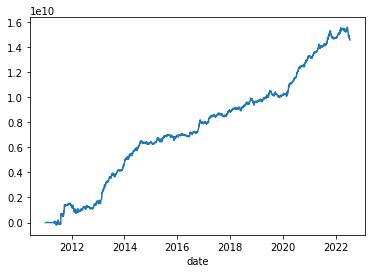

                   tscarry-ryieldnmb-commod_mkts-1-80-1-0.2
calmar_ratio_10y                               1.384807e+00
calmar_ratio_11y                               1.373469e+00
calmar_ratio_1y                                5.114306e-01
calmar_ratio_2y                                1.416018e+00
calmar_ratio_3y                                1.401936e+00
calmar_ratio_4y                                1.360659e+00
calmar_ratio_5y                                1.228213e+00
calmar_ratio_6y                                1.268994e+00
calmar_ratio_7y                                1.130888e+00
calmar_ratio_8y                                1.097026e+00
calmar_ratio_9y                                1.227402e+00
sharpe_ratio_10y                               2.263123e+00
sharpe_ratio_11y                               2.070877e+00
sharpe_ratio_1y                                6.348473e-01
sharpe_ratio_2y                                2.020327e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


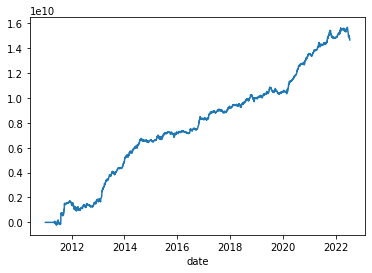

                   tscarry-ryieldnmb-commod_mkts-1-80-2-0.2
calmar_ratio_10y                               1.364351e+00
calmar_ratio_11y                               1.362749e+00
calmar_ratio_1y                                3.896125e-01
calmar_ratio_2y                                1.306827e+00
calmar_ratio_3y                                1.299350e+00
calmar_ratio_4y                                1.280075e+00
calmar_ratio_5y                                1.156341e+00
calmar_ratio_6y                                1.216192e+00
calmar_ratio_7y                                1.090449e+00
calmar_ratio_8y                                1.065629e+00
calmar_ratio_9y                                1.202470e+00
sharpe_ratio_10y                               2.270182e+00
sharpe_ratio_11y                               2.077295e+00
sharpe_ratio_1y                                4.928104e-01
sharpe_ratio_2y                                1.897640e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


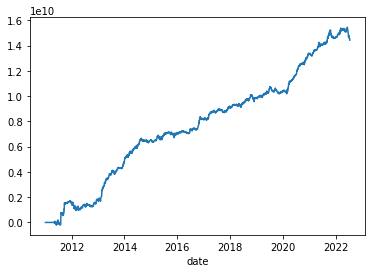

                   tscarry-ryieldnmb-commod_mkts-1-80-3-0.2
calmar_ratio_10y                               1.339916e+00
calmar_ratio_11y                               1.343773e+00
calmar_ratio_1y                                3.479715e-01
calmar_ratio_2y                                1.273852e+00
calmar_ratio_3y                                1.266102e+00
calmar_ratio_4y                                1.254434e+00
calmar_ratio_5y                                1.132284e+00
calmar_ratio_6y                                1.195807e+00
calmar_ratio_7y                                1.076195e+00
calmar_ratio_8y                                1.050292e+00
calmar_ratio_9y                                1.174498e+00
sharpe_ratio_10y                               2.224598e+00
sharpe_ratio_11y                               2.036281e+00
sharpe_ratio_1y                                4.404445e-01
sharpe_ratio_2y                                1.850210e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


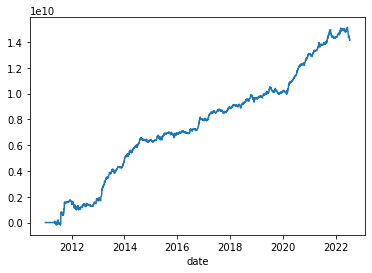

                   tscarry-ryieldnmb-commod_mkts-1-80-4-0.2
calmar_ratio_10y                               1.317537e+00
calmar_ratio_11y                               1.322567e+00
calmar_ratio_1y                                3.341717e-01
calmar_ratio_2y                                1.274916e+00
calmar_ratio_3y                                1.246723e+00
calmar_ratio_4y                                1.242780e+00
calmar_ratio_5y                                1.118201e+00
calmar_ratio_6y                                1.178456e+00
calmar_ratio_7y                                1.061413e+00
calmar_ratio_8y                                1.025284e+00
calmar_ratio_9y                                1.145899e+00
sharpe_ratio_10y                               2.182576e+00
sharpe_ratio_11y                               1.991938e+00
sharpe_ratio_1y                                4.240076e-01
sharpe_ratio_2y                                1.851322e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


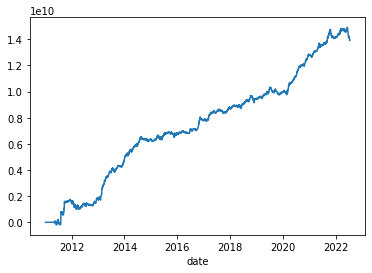

                   tscarry-ryieldnmb-commod_mkts-1-80-5-0.2
calmar_ratio_10y                               1.297022e+00
calmar_ratio_11y                               1.304049e+00
calmar_ratio_1y                                3.429190e-01
calmar_ratio_2y                                1.286182e+00
calmar_ratio_3y                                1.236166e+00
calmar_ratio_4y                                1.233257e+00
calmar_ratio_5y                                1.102781e+00
calmar_ratio_6y                                1.161604e+00
calmar_ratio_7y                                1.045241e+00
calmar_ratio_8y                                1.002326e+00
calmar_ratio_9y                                1.121420e+00
sharpe_ratio_10y                               2.150543e+00
sharpe_ratio_11y                               1.960335e+00
sharpe_ratio_1y                                4.353478e-01
sharpe_ratio_2y                                1.868408e+00
sharpe_ratio_3y                         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


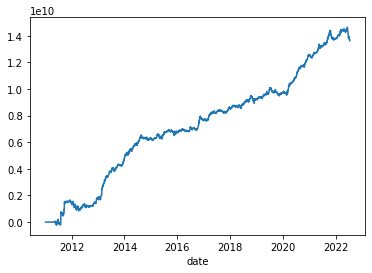

                   tscarry-ryieldnmb-commod_mkts-1-80-10-0.2
calmar_ratio_10y                                1.273752e+00
calmar_ratio_11y                                1.273155e+00
calmar_ratio_1y                                 3.753190e-01
calmar_ratio_2y                                 1.271270e+00
calmar_ratio_3y                                 1.206699e+00
calmar_ratio_4y                                 1.200107e+00
calmar_ratio_5y                                 1.076674e+00
calmar_ratio_6y                                 1.111111e+00
calmar_ratio_7y                                 1.003450e+00
calmar_ratio_8y                                 9.661088e-01
calmar_ratio_9y                                 1.090883e+00
sharpe_ratio_10y                                2.148828e+00
sharpe_ratio_11y                                1.939420e+00
sharpe_ratio_1y                                 4.870030e-01
sharpe_ratio_2y                                 1.881573e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


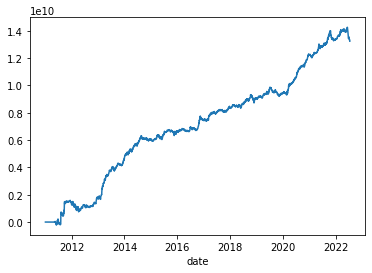

                   tscarry-ryieldnmb-commod_mkts-1-80-15-0.2
calmar_ratio_10y                                1.229861e+00
calmar_ratio_11y                                1.229750e+00
calmar_ratio_1y                                 3.516425e-01
calmar_ratio_2y                                 1.227236e+00
calmar_ratio_3y                                 1.148232e+00
calmar_ratio_4y                                 1.144091e+00
calmar_ratio_5y                                 1.038471e+00
calmar_ratio_6y                                 1.068127e+00
calmar_ratio_7y                                 9.663874e-01
calmar_ratio_8y                                 9.366409e-01
calmar_ratio_9y                                 1.043639e+00
sharpe_ratio_10y                                2.113706e+00
sharpe_ratio_11y                                1.909251e+00
sharpe_ratio_1y                                 4.615158e-01
sharpe_ratio_2y                                 1.837707e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


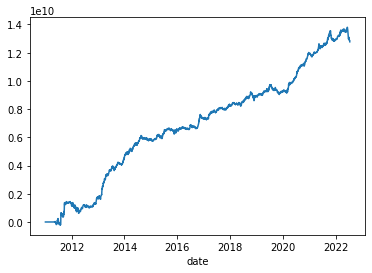

                   tscarry-ryieldnmb-commod_mkts-1-80-20-0.2
calmar_ratio_10y                                1.172642e+00
calmar_ratio_11y                                1.174725e+00
calmar_ratio_1y                                 2.982958e-01
calmar_ratio_2y                                 1.128464e+00
calmar_ratio_3y                                 1.022555e+00
calmar_ratio_4y                                 1.045936e+00
calmar_ratio_5y                                 9.636431e-01
calmar_ratio_6y                                 9.910464e-01
calmar_ratio_7y                                 9.053037e-01
calmar_ratio_8y                                 8.891911e-01
calmar_ratio_9y                                 9.913410e-01
sharpe_ratio_10y                                2.065484e+00
sharpe_ratio_11y                                1.871319e+00
sharpe_ratio_1y                                 3.976280e-01
sharpe_ratio_2y                                 1.717751e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


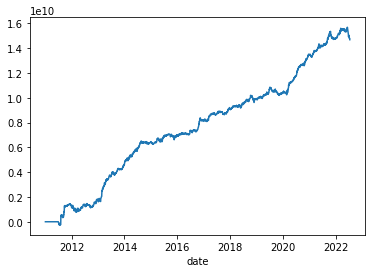

                   tscarry-ryieldnmb-commod_mkts-1-120-1-0.2
calmar_ratio_10y                                1.386330e+00
calmar_ratio_11y                                1.396189e+00
calmar_ratio_1y                                 4.993632e-01
calmar_ratio_2y                                 1.387195e+00
calmar_ratio_3y                                 1.334264e+00
calmar_ratio_4y                                 1.317005e+00
calmar_ratio_5y                                 1.218959e+00
calmar_ratio_6y                                 1.261686e+00
calmar_ratio_7y                                 1.143914e+00
calmar_ratio_8y                                 1.119989e+00
calmar_ratio_9y                                 1.233396e+00
sharpe_ratio_10y                                2.277157e+00
sharpe_ratio_11y                                2.131315e+00
sharpe_ratio_1y                                 6.384321e-01
sharpe_ratio_2y                                 2.004984e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


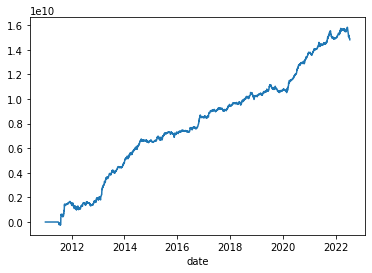

                   tscarry-ryieldnmb-commod_mkts-1-120-2-0.2
calmar_ratio_10y                                1.367963e+00
calmar_ratio_11y                                1.387609e+00
calmar_ratio_1y                                 3.949142e-01
calmar_ratio_2y                                 1.295069e+00
calmar_ratio_3y                                 1.252504e+00
calmar_ratio_4y                                 1.246263e+00
calmar_ratio_5y                                 1.156149e+00
calmar_ratio_6y                                 1.217693e+00
calmar_ratio_7y                                 1.111838e+00
calmar_ratio_8y                                 1.093459e+00
calmar_ratio_9y                                 1.211709e+00
sharpe_ratio_10y                                2.282204e+00
sharpe_ratio_11y                                2.137192e+00
sharpe_ratio_1y                                 5.138905e-01
sharpe_ratio_2y                                 1.902589e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


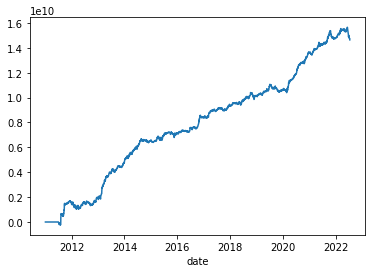

                   tscarry-ryieldnmb-commod_mkts-1-120-3-0.2
calmar_ratio_10y                                1.348243e+00
calmar_ratio_11y                                1.372803e+00
calmar_ratio_1y                                 3.584822e-01
calmar_ratio_2y                                 1.273472e+00
calmar_ratio_3y                                 1.230239e+00
calmar_ratio_4y                                 1.231113e+00
calmar_ratio_5y                                 1.138812e+00
calmar_ratio_6y                                 1.203582e+00
calmar_ratio_7y                                 1.102503e+00
calmar_ratio_8y                                 1.080514e+00
calmar_ratio_9y                                 1.187102e+00
sharpe_ratio_10y                                2.242001e+00
sharpe_ratio_11y                                2.100558e+00
sharpe_ratio_1y                                 4.667294e-01
sharpe_ratio_2y                                 1.871767e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


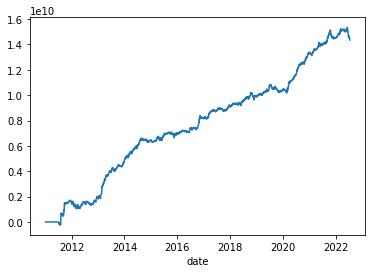

                   tscarry-ryieldnmb-commod_mkts-1-120-4-0.2
calmar_ratio_10y                                1.330083e+00
calmar_ratio_11y                                1.354512e+00
calmar_ratio_1y                                 3.412618e-01
calmar_ratio_2y                                 1.279685e+00
calmar_ratio_3y                                 1.213771e+00
calmar_ratio_4y                                 1.223009e+00
calmar_ratio_5y                                 1.127320e+00
calmar_ratio_6y                                 1.190954e+00
calmar_ratio_7y                                 1.091220e+00
calmar_ratio_8y                                 1.058283e+00
calmar_ratio_9y                                 1.161246e+00
sharpe_ratio_10y                                2.203978e+00
sharpe_ratio_11y                                2.058575e+00
sharpe_ratio_1y                                 4.448133e-01
sharpe_ratio_2y                                 1.878070e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


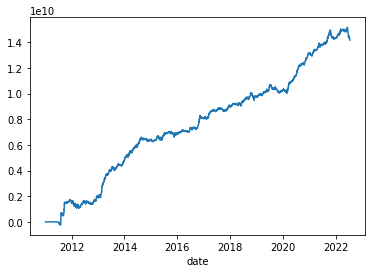

                   tscarry-ryieldnmb-commod_mkts-1-120-5-0.2
calmar_ratio_10y                                1.312818e+00
calmar_ratio_11y                                1.338714e+00
calmar_ratio_1y                                 3.511449e-01
calmar_ratio_2y                                 1.295633e+00
calmar_ratio_3y                                 1.203994e+00
calmar_ratio_4y                                 1.213906e+00
calmar_ratio_5y                                 1.112000e+00
calmar_ratio_6y                                 1.175024e+00
calmar_ratio_7y                                 1.074497e+00
calmar_ratio_8y                                 1.037376e+00
calmar_ratio_9y                                 1.138355e+00
sharpe_ratio_10y                                2.177872e+00
sharpe_ratio_11y                                2.031342e+00
sharpe_ratio_1y                                 4.581827e-01
sharpe_ratio_2y                                 1.902932e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


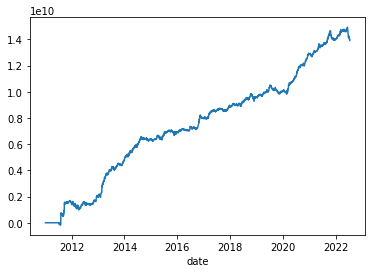

                   tscarry-ryieldnmb-commod_mkts-1-120-10-0.2
calmar_ratio_10y                                 1.291595e+00
calmar_ratio_11y                                 1.309751e+00
calmar_ratio_1y                                  3.672232e-01
calmar_ratio_2y                                  1.285880e+00
calmar_ratio_3y                                  1.183566e+00
calmar_ratio_4y                                  1.191347e+00
calmar_ratio_5y                                  1.087521e+00
calmar_ratio_6y                                  1.134135e+00
calmar_ratio_7y                                  1.037814e+00
calmar_ratio_8y                                  1.008316e+00
calmar_ratio_9y                                  1.108163e+00
sharpe_ratio_10y                                 2.170738e+00
sharpe_ratio_11y                                 2.005219e+00
sharpe_ratio_1y                                  4.865215e-01
sharpe_ratio_2y                                  1.914615e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


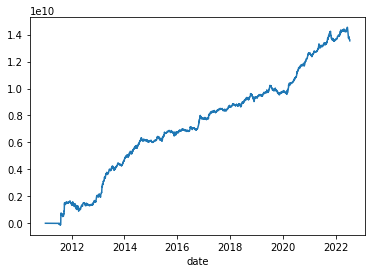

                   tscarry-ryieldnmb-commod_mkts-1-120-15-0.2
calmar_ratio_10y                                 1.253295e+00
calmar_ratio_11y                                 1.270256e+00
calmar_ratio_1y                                  3.509185e-01
calmar_ratio_2y                                  1.254245e+00
calmar_ratio_3y                                  1.142069e+00
calmar_ratio_4y                                  1.155465e+00
calmar_ratio_5y                                  1.058441e+00
calmar_ratio_6y                                  1.099865e+00
calmar_ratio_7y                                  1.008722e+00
calmar_ratio_8y                                  9.864255e-01
calmar_ratio_9y                                  1.067720e+00
sharpe_ratio_10y                                 2.134529e+00
sharpe_ratio_11y                                 1.972898e+00
sharpe_ratio_1y                                  4.673247e-01
sharpe_ratio_2y                                  1.878215e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


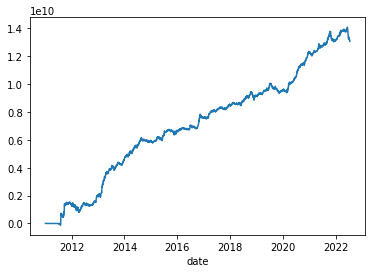

                   tscarry-ryieldnmb-commod_mkts-1-120-20-0.2
calmar_ratio_10y                                 1.197709e+00
calmar_ratio_11y                                 1.215998e+00
calmar_ratio_1y                                  3.007682e-01
calmar_ratio_2y                                  1.165004e+00
calmar_ratio_3y                                  1.031977e+00
calmar_ratio_4y                                  1.073550e+00
calmar_ratio_5y                                  9.925931e-01
calmar_ratio_6y                                  1.028066e+00
calmar_ratio_7y                                  9.521645e-01
calmar_ratio_8y                                  9.406113e-01
calmar_ratio_9y                                  1.015045e+00
sharpe_ratio_10y                                 2.083004e+00
sharpe_ratio_11y                                 1.932617e+00
sharpe_ratio_1y                                  4.053455e-01
sharpe_ratio_2y                                  1.767287e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


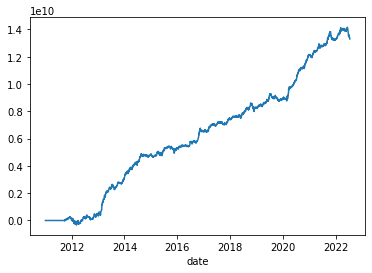

                   tscarry-ryieldnmb-commod_mkts-1-180-1-0.2
calmar_ratio_10y                                1.590442e+00
calmar_ratio_11y                                1.465364e+00
calmar_ratio_1y                                 6.202631e-01
calmar_ratio_2y                                 1.689183e+00
calmar_ratio_3y                                 1.629961e+00
calmar_ratio_4y                                 1.627742e+00
calmar_ratio_5y                                 1.489424e+00
calmar_ratio_6y                                 1.518373e+00
calmar_ratio_7y                                 1.388020e+00
calmar_ratio_8y                                 1.352005e+00
calmar_ratio_9y                                 1.438063e+00
sharpe_ratio_10y                                2.255706e+00
sharpe_ratio_11y                                2.051552e+00
sharpe_ratio_1y                                 7.088264e-01
sharpe_ratio_2y                                 2.131072e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


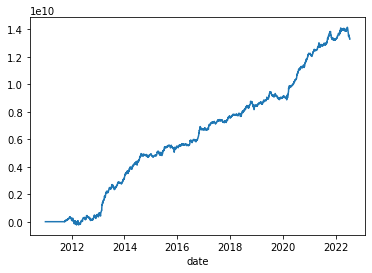

                   tscarry-ryieldnmb-commod_mkts-1-180-2-0.2
calmar_ratio_10y                                1.567455e+00
calmar_ratio_11y                                1.446851e+00
calmar_ratio_1y                                 5.325373e-01
calmar_ratio_2y                                 1.605498e+00
calmar_ratio_3y                                 1.539701e+00
calmar_ratio_4y                                 1.553223e+00
calmar_ratio_5y                                 1.420815e+00
calmar_ratio_6y                                 1.470759e+00
calmar_ratio_7y                                 1.350049e+00
calmar_ratio_8y                                 1.321837e+00
calmar_ratio_9y                                 1.411579e+00
sharpe_ratio_10y                                2.255846e+00
sharpe_ratio_11y                                2.054633e+00
sharpe_ratio_1y                                 6.191431e-01
sharpe_ratio_2y                                 2.056929e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


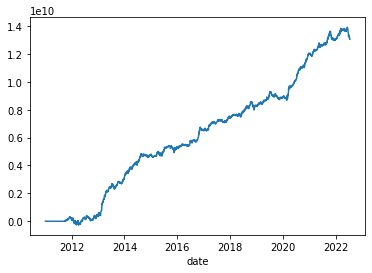

                   tscarry-ryieldnmb-commod_mkts-1-180-3-0.2
calmar_ratio_10y                                1.546451e+00
calmar_ratio_11y                                1.426175e+00
calmar_ratio_1y                                 4.988464e-01
calmar_ratio_2y                                 1.591548e+00
calmar_ratio_3y                                 1.514739e+00
calmar_ratio_4y                                 1.538187e+00
calmar_ratio_5y                                 1.401484e+00
calmar_ratio_6y                                 1.456663e+00
calmar_ratio_7y                                 1.338552e+00
calmar_ratio_8y                                 1.306350e+00
calmar_ratio_9y                                 1.385205e+00
sharpe_ratio_10y                                2.216452e+00
sharpe_ratio_11y                                2.017374e+00
sharpe_ratio_1y                                 5.812105e-01
sharpe_ratio_2y                                 2.040888e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


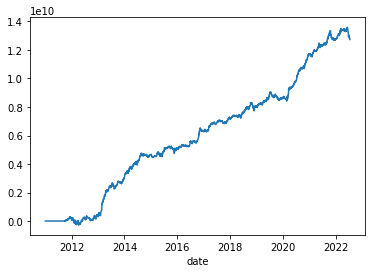

                   tscarry-ryieldnmb-commod_mkts-1-180-4-0.2
calmar_ratio_10y                                1.525089e+00
calmar_ratio_11y                                1.402545e+00
calmar_ratio_1y                                 4.819896e-01
calmar_ratio_2y                                 1.608508e+00
calmar_ratio_3y                                 1.499217e+00
calmar_ratio_4y                                 1.532638e+00
calmar_ratio_5y                                 1.387993e+00
calmar_ratio_6y                                 1.441912e+00
calmar_ratio_7y                                 1.324854e+00
calmar_ratio_8y                                 1.282282e+00
calmar_ratio_9y                                 1.357864e+00
sharpe_ratio_10y                                2.177050e+00
sharpe_ratio_11y                                1.974575e+00
sharpe_ratio_1y                                 5.624140e-01
sharpe_ratio_2y                                 2.055972e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


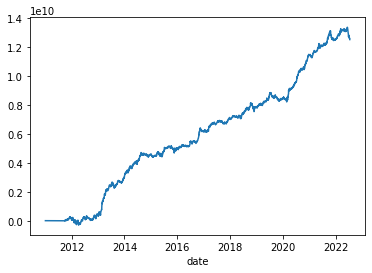

                   tscarry-ryieldnmb-commod_mkts-1-180-5-0.2
calmar_ratio_10y                                1.509991e+00
calmar_ratio_11y                                1.386826e+00
calmar_ratio_1y                                 4.994769e-01
calmar_ratio_2y                                 1.642253e+00
calmar_ratio_3y                                 1.496971e+00
calmar_ratio_4y                                 1.531375e+00
calmar_ratio_5y                                 1.377153e+00
calmar_ratio_6y                                 1.429451e+00
calmar_ratio_7y                                 1.310352e+00
calmar_ratio_8y                                 1.263205e+00
calmar_ratio_9y                                 1.336741e+00
sharpe_ratio_10y                                2.151759e+00
sharpe_ratio_11y                                1.947520e+00
sharpe_ratio_1y                                 5.830103e-01
sharpe_ratio_2y                                 2.094893e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


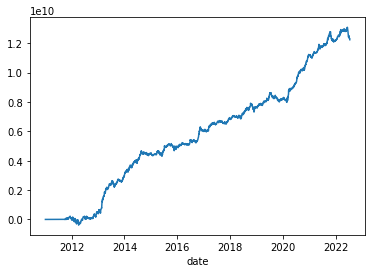

                   tscarry-ryieldnmb-commod_mkts-1-180-10-0.2
calmar_ratio_10y                                 1.486248e+00
calmar_ratio_11y                                 1.358417e+00
calmar_ratio_1y                                  5.258621e-01
calmar_ratio_2y                                  1.635537e+00
calmar_ratio_3y                                  1.476145e+00
calmar_ratio_4y                                  1.512443e+00
calmar_ratio_5y                                  1.360273e+00
calmar_ratio_6y                                  1.388862e+00
calmar_ratio_7y                                  1.274302e+00
calmar_ratio_8y                                  1.233567e+00
calmar_ratio_9y                                  1.305398e+00
sharpe_ratio_10y                                 2.131457e+00
sharpe_ratio_11y                                 1.916637e+00
sharpe_ratio_1y                                  6.225895e-01
sharpe_ratio_2y                                  2.109621e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


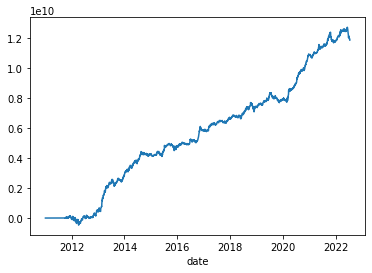

                   tscarry-ryieldnmb-commod_mkts-1-180-15-0.2
calmar_ratio_10y                                 1.434190e+00
calmar_ratio_11y                                 1.306938e+00
calmar_ratio_1y                                  5.191476e-01
calmar_ratio_2y                                  1.598449e+00
calmar_ratio_3y                                  1.422604e+00
calmar_ratio_4y                                  1.460134e+00
calmar_ratio_5y                                  1.319352e+00
calmar_ratio_6y                                  1.338485e+00
calmar_ratio_7y                                  1.231951e+00
calmar_ratio_8y                                  1.200356e+00
calmar_ratio_9y                                  1.253210e+00
sharpe_ratio_10y                                 2.092094e+00
sharpe_ratio_11y                                 1.875112e+00
sharpe_ratio_1y                                  6.212020e-01
sharpe_ratio_2y                                  2.085111e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


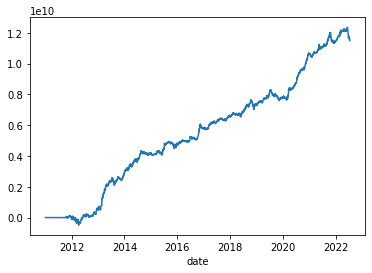

                   tscarry-ryieldnmb-commod_mkts-1-180-20-0.2
calmar_ratio_10y                                 1.368162e+00
calmar_ratio_11y                                 1.255100e+00
calmar_ratio_1y                                  4.692106e-01
calmar_ratio_2y                                  1.514451e+00
calmar_ratio_3y                                  1.292653e+00
calmar_ratio_4y                                  1.359244e+00
calmar_ratio_5y                                  1.238345e+00
calmar_ratio_6y                                  1.249827e+00
calmar_ratio_7y                                  1.162554e+00
calmar_ratio_8y                                  1.145172e+00
calmar_ratio_9y                                  1.192747e+00
sharpe_ratio_10y                                 2.041954e+00
sharpe_ratio_11y                                 1.842220e+00
sharpe_ratio_1y                                  5.684595e-01
sharpe_ratio_2y                                  2.003293e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


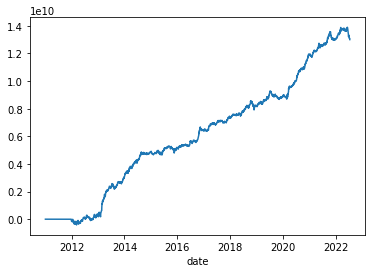

                   tscarry-ryieldnmb-commod_mkts-1-240-1-0.2
calmar_ratio_10y                                1.502416e+00
calmar_ratio_11y                                1.372225e+00
calmar_ratio_1y                                 4.840657e-01
calmar_ratio_2y                                 1.598514e+00
calmar_ratio_3y                                 1.452434e+00
calmar_ratio_4y                                 1.487795e+00
calmar_ratio_5y                                 1.376209e+00
calmar_ratio_6y                                 1.420640e+00
calmar_ratio_7y                                 1.305857e+00
calmar_ratio_8y                                 1.254878e+00
calmar_ratio_9y                                 1.347674e+00
sharpe_ratio_10y                                2.219379e+00
sharpe_ratio_11y                                2.021244e+00
sharpe_ratio_1y                                 5.790082e-01
sharpe_ratio_2y                                 2.088064e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


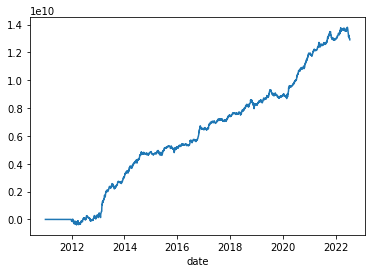

                   tscarry-ryieldnmb-commod_mkts-1-240-2-0.2
calmar_ratio_10y                                1.482680e+00
calmar_ratio_11y                                1.349607e+00
calmar_ratio_1y                                 4.083635e-01
calmar_ratio_2y                                 1.538470e+00
calmar_ratio_3y                                 1.388348e+00
calmar_ratio_4y                                 1.434696e+00
calmar_ratio_5y                                 1.324852e+00
calmar_ratio_6y                                 1.385240e+00
calmar_ratio_7y                                 1.278509e+00
calmar_ratio_8y                                 1.229251e+00
calmar_ratio_9y                                 1.323033e+00
sharpe_ratio_10y                                2.216482e+00
sharpe_ratio_11y                                2.011847e+00
sharpe_ratio_1y                                 4.959183e-01
sharpe_ratio_2y                                 2.035926e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


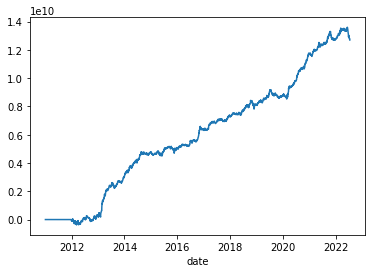

                   tscarry-ryieldnmb-commod_mkts-1-240-3-0.2
calmar_ratio_10y                                1.457680e+00
calmar_ratio_11y                                1.329552e+00
calmar_ratio_1y                                 3.742295e-01
calmar_ratio_2y                                 1.519834e+00
calmar_ratio_3y                                 1.358618e+00
calmar_ratio_4y                                 1.417651e+00
calmar_ratio_5y                                 1.303985e+00
calmar_ratio_6y                                 1.367031e+00
calmar_ratio_7y                                 1.263836e+00
calmar_ratio_8y                                 1.207975e+00
calmar_ratio_9y                                 1.292788e+00
sharpe_ratio_10y                                2.174031e+00
sharpe_ratio_11y                                1.977945e+00
sharpe_ratio_1y                                 4.563220e-01
sharpe_ratio_2y                                 2.016798e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


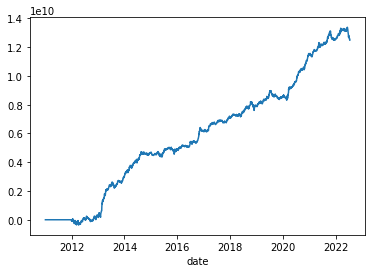

                   tscarry-ryieldnmb-commod_mkts-1-240-4-0.2
calmar_ratio_10y                                1.442210e+00
calmar_ratio_11y                                1.314138e+00
calmar_ratio_1y                                 3.559893e-01
calmar_ratio_2y                                 1.525286e+00
calmar_ratio_3y                                 1.361370e+00
calmar_ratio_4y                                 1.425801e+00
calmar_ratio_5y                                 1.302051e+00
calmar_ratio_6y                                 1.361772e+00
calmar_ratio_7y                                 1.259307e+00
calmar_ratio_8y                                 1.190725e+00
calmar_ratio_9y                                 1.271586e+00
sharpe_ratio_10y                                2.141784e+00
sharpe_ratio_11y                                1.946196e+00
sharpe_ratio_1y                                 4.354457e-01
sharpe_ratio_2y                                 2.023767e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


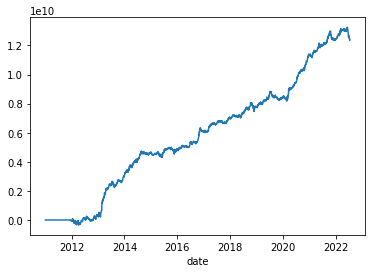

                   tscarry-ryieldnmb-commod_mkts-1-240-5-0.2
calmar_ratio_10y                                1.431661e+00
calmar_ratio_11y                                1.306498e+00
calmar_ratio_1y                                 3.731568e-01
calmar_ratio_2y                                 1.549113e+00
calmar_ratio_3y                                 1.370608e+00
calmar_ratio_4y                                 1.435624e+00
calmar_ratio_5y                                 1.299638e+00
calmar_ratio_6y                                 1.355672e+00
calmar_ratio_7y                                 1.251327e+00
calmar_ratio_8y                                 1.177487e+00
calmar_ratio_9y                                 1.254994e+00
sharpe_ratio_10y                                2.121471e+00
sharpe_ratio_11y                                1.929542e+00
sharpe_ratio_1y                                 4.569216e-01
sharpe_ratio_2y                                 2.056348e+00
sharpe_ratio_3y         

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


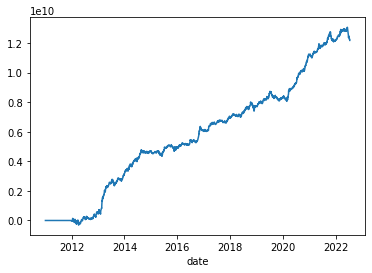

                   tscarry-ryieldnmb-commod_mkts-1-240-10-0.2
calmar_ratio_10y                                 1.407742e+00
calmar_ratio_11y                                 1.292485e+00
calmar_ratio_1y                                  3.938982e-01
calmar_ratio_2y                                  1.548149e+00
calmar_ratio_3y                                  1.351240e+00
calmar_ratio_4y                                  1.405253e+00
calmar_ratio_5y                                  1.272163e+00
calmar_ratio_6y                                  1.309822e+00
calmar_ratio_7y                                  1.213450e+00
calmar_ratio_8y                                  1.152274e+00
calmar_ratio_9y                                  1.221391e+00
sharpe_ratio_10y                                 2.106639e+00
sharpe_ratio_11y                                 1.924365e+00
sharpe_ratio_1y                                  4.891376e-01
sharpe_ratio_2y                                  2.074978e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


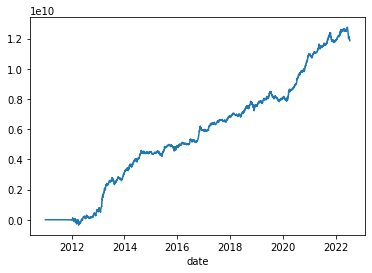

                   tscarry-ryieldnmb-commod_mkts-1-240-15-0.2
calmar_ratio_10y                                 1.361036e+00
calmar_ratio_11y                                 1.251732e+00
calmar_ratio_1y                                  3.980677e-01
calmar_ratio_2y                                  1.526978e+00
calmar_ratio_3y                                  1.311162e+00
calmar_ratio_4y                                  1.357956e+00
calmar_ratio_5y                                  1.233774e+00
calmar_ratio_6y                                  1.265128e+00
calmar_ratio_7y                                  1.174501e+00
calmar_ratio_8y                                  1.125110e+00
calmar_ratio_9y                                  1.173444e+00
sharpe_ratio_10y                                 2.072100e+00
sharpe_ratio_11y                                 1.896986e+00
sharpe_ratio_1y                                  4.993794e-01
sharpe_ratio_2y                                  2.067976e+00
sharpe_r

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


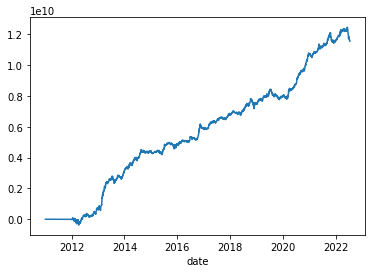

                   tscarry-ryieldnmb-commod_mkts-1-240-20-0.2
calmar_ratio_10y                                 1.306341e+00
calmar_ratio_11y                                 1.210314e+00
calmar_ratio_1y                                  3.670803e-01
calmar_ratio_2y                                  1.460455e+00
calmar_ratio_3y                                  1.208744e+00
calmar_ratio_4y                                  1.274759e+00
calmar_ratio_5y                                  1.166128e+00
calmar_ratio_6y                                  1.190864e+00
calmar_ratio_7y                                  1.115792e+00
calmar_ratio_8y                                  1.081172e+00
calmar_ratio_9y                                  1.123720e+00
sharpe_ratio_10y                                 2.030498e+00
sharpe_ratio_11y                                 1.873513e+00
sharpe_ratio_1y                                  4.654957e-01
sharpe_ratio_2y                                  2.002911e+00
sharpe_r

In [36]:
res = {}
stats_list = []
cum_list = []
sratio_years = [1,2,3,4,5,6,7,8,9,10,11]
pnl_tenors = [ '%sy' % (i) for i in sratio_years]
rev_char = '!'

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg']

product_list = commod_mkts_p2 # metal_mixed_mkts # +  petro_mixed_mkts #  
product_name = 'commod_mkts'

sim_name = 'tscarry'
run_mode = 'ryieldnmb'

asset_scaling = True

    
start_date = datetime.date(2011,1,1)
end_date = datetime.date(2022,7,12)
quantile = 0.2
cost_ratio = 0.5
pos_std = 1
std_win = 20

win = 16
ma_win = 8
rebal = 5
params = [0.0, 0.0]

exec_field = 'open'
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quantile), str(end_date)]))

#curve_list = ['linear', 'semilinear', 'reverting', 'absorbing', 'sigmoid', 'band']
crv_param = 2.0

index_list = [5, 10, 20, 40, 60, 80, 120, 180, 240] # [i for i in range(10, 330, 10)]  # [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # [1, 3, 5, 7, 10, 15, 20] # + range(10, 250, 10) # 
column_list =  [1, 2, 3, 4, 5, 10, 15, 20] # [10, 20, 40, 60] #   curve_list #   range(10, 130, 10) # # [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #

sratio = {}
run_sratio = True

pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
#pos_map = (None, {}, '')
#pos_map = (misc.sign, {}, 'sign')
pos_map = (dh.response_curve, {'param': crv_param, "response": 'reverting'}, 'reverting')

for scen in scenarios:
    scen_x = scen[0]
    scen_y = scen[1]
    if run_mode in ['ryield']:
        win = 1
        ma_win = 1
        rebal = scen_x
        pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
        if sim_name == 'xscarry':
            quantile = scen_x * 0.1
    elif run_mode in ['basmom', 'mom', 'clbrk', 'hlbrk', 'ewmac']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif run_mode in ['ewmacdff']:
        win = scen_x
        rebal = scen_y
        params = params
    elif run_mode in ['skew!ema']:
        win = scen_x
        ma_win = scen_y
        rebal = 1
        params = [0.0, 0.0]
    elif run_mode in ['mixmom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif ('ts' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y
        #pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
    elif ('xs' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y    
    elif run_mode in ['basmomxma', 'basmomsma', 'basmomnma', 'basmomnmb', 'basmomzlv', \
                      'momsma', 'momxma', 'momnma', 'momnmb', 'momzlv', 'macdnma']:
        win = scen_x
        ma_win = 120
        rebal = 5
        if run_mode in ['macdnma']:
            params = [scen_y, 80.0/win]
    else:
        print("unsupported run_mode")
        continue

    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    run_args['asset_scaling'] = asset_scaling
    run_args['pnl_tenors'] = pnl_tenors
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                   ('calmar' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharpe_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')

if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])